# Demo - Topic Network Analysis in Online Communities

## Step 1 : Import libraries

In [399]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

import re
import spacy
from nltk.corpus import stopwords

from ipynb.fs.full.helper_functions import *

import networkx as nx

from itertools import permutations
from itertools import combinations

import dataframe_image as dfi
import pickle

## Step 2 : Load datasets

In [751]:
# Read data from csv files
'''Ethereum'''
df_eth_1 = pd.read_csv('../data_2.0/ethereum_posts_reddit.csv')
df_eth_2 = pd.read_csv('../data_2.0/ethereum_comments_reddit.csv')

'''Litecoin'''
df_lit_1 = pd.read_csv('../data_2.0/litecoin_posts_reddit.csv')
df_lit_2 = pd.read_csv('../data_2.0/litecoin_comments_reddit.csv')

'''Dogecoin'''
df_dog_1 = pd.read_csv('../data_2.0/dogecoin_posts_reddit.csv')
df_dog_2 = pd.read_csv('../data_2.0/dogecoin_comments_reddit.csv')

'''NEM'''
df_nem_1 = pd.read_csv('../data_2.0/nem_posts_reddit.csv')
df_nem_2 = pd.read_csv('../data_2.0/nem_comments_reddit.csv')

'''Ripple'''
df_rip_1 = pd.read_csv('../data_2.0/ripple_posts_reddit.csv')
df_rip_2 = pd.read_csv('../data_2.0/ripple_comments_reddit.csv')

# '''Binance'''
# df_bin_1 = pd.read_csv('../data_2.0/binance_posts_reddit.csv')
# df_bin_2 = pd.read_csv('../data_2.0/binance_comments_reddit.csv')

'''Iota'''
df_iot_1 = pd.read_csv('../data_2.0/iota_posts_reddit.csv')
df_iot_2 = pd.read_csv('../data_2.0/iota_comments_reddit.csv')

'''Cardano'''
df_car_1 = pd.read_csv('../data_2.0/cardano_posts_reddit.csv')
df_car_2 = pd.read_csv('../data_2.0/cardano_comments_reddit.csv')


''' -> Add additional data below'''
# df_XXX_1 = pd.read_csv('../data/XXX_posts_reddit.csv')
# df_XXX_2 = pd.read_csv('../data/XXX_comments_reddit.csv')

' -> Add additional data below'

## Step 3 : Data exploration

##### We are provided with eight datasets. Each dataset consists of a "post.csv" file and a "comment.csv" file. These files are extracted from the subreddits within the Reddit community

In [776]:
# Posts
df_eth_1

sub_id subreddit_id subreddit_name       sub_author  \
0      t3_lqr35c     t5_2zf9m       ethereum       rexaffects   
1      t3_lqqli4     t5_2zf9m       ethereum         Hapstipo   
2      t3_lqms39     t5_2zf9m       ethereum          mfinner   
3      t3_lqmjz6     t5_2zf9m       ethereum       BanklessHQ   
4      t3_lqln53     t5_2zf9m       ethereum        DappRadar   
...          ...          ...            ...              ...   
15812  t3_ob6de6     t5_2zf9m       ethereum     Cryptostormz   
15813  t3_oayh7i     t5_2zf9m       ethereum          usman07   
15814  t3_ob25uz     t5_2zf9m       ethereum      Alma_Mandre   
15815  t3_oas9h0     t5_2zf9m       ethereum     PouItrygeist   
15816  t3_oae8pk     t5_2zf9m       ethereum  sumethreuaweiei   

                                               sub_title  \
0                                  New Ethereum artwork!   
1                                  Only 8mh/s on rx 580?   
2      Ethereum Layer 2 is here and ramping up each d...   
3      Mark Cuban says politicians can’t stop #DeFi l...   
4      What is the difference between DeFi and High-R...   
...                                                  ...   
15812  How do you think eth 2.0 will affect the entir...   
15813  I think this could be one solution to bridge m...   
15814            Urgent Issue With DyDx. Traders Beware!   
15815                                A father's day gift   
15816        List of Discord Servers for DeFi Developers   

                                                sub_body  sub_score  \
0                                                    NaN        681   
1                                              [removed]          1   
2                                                    NaN        110   
3                                                    NaN       2031   
4                                                    NaN          3   
...                                                  ...        ...   
15812                                                NaN          0   
15813                                                NaN          0   
15814                                                NaN          1   
15815  So I tried to put this on another crypto subre...         51   
15816                                                NaN          1   

       sub_upvote_ratio  sub_num_comments             sub_date  \
0                  0.96               126  2021-02-23 19:42:09   
1                  0.60                36  2021-02-23 19:21:22   
2                  0.97                11  2021-02-23 16:42:59   
3                  0.97               514  2021-02-23 16:33:42   
4                  0.71                 2  2021-02-23 15:56:29   
...                 ...               ...                  ...   
15812              0.50                 2  2021-06-30 20:55:41   
15813              0.40                 0  2021-06-30 14:29:14   
15814              0.55                 0  2021-06-30 17:31:03   
15815              0.85                 1  2021-06-30 07:37:27   
15816              0.60                 0  2021-06-29 18:30:16   

                       updated_at  subreddit_subscribers  
0             2021-02-25 13:47:58                 690562  
1             2021-02-25 13:30:17                 690542  
2             2021-02-25 11:19:54                 690372  
3             2021-02-25 11:12:29                 690364  
4             2021-02-25 10:42:13                 690308  
...                           ...                    ...  
15812  2021-07-01 00:07:59.720757                1027769  
15813  2021-07-01 12:09:51.749668                1027769  
15814  2021-07-01 12:09:35.887882                1027769  
15815  2021-07-01 12:10:04.013095                1027237  
15816  2021-07-01 12:10:24.176393                1026775  

[15817 rows x 12 columns]

In [755]:
df_lit_1

sub_id subreddit_id subreddit_name         sub_author  \
0     t3_mm2xyo     t5_2szgd       litecoin        BryantNetEq   
1     t3_lqv4xa     t5_2szgd       litecoin        PitchNo7027   
2     t3_lquxff     t5_2szgd       litecoin          OhZone210   
3     t3_lqum1g     t5_2szgd       litecoin           daclub33   
4     t3_lquktk     t5_2szgd       litecoin     _TheDadFather_   
...         ...          ...            ...                ...   
3754  t3_o9xrd9     t5_2szgd       litecoin           hedonova   
3755  t3_o9zm7t     t5_2szgd       litecoin         Sgadiyar06   
3756  t3_o83zpi     t5_2szgd       litecoin    DarkVindication   
3757  t3_o8rwom     t5_2szgd       litecoin         kornwalski   
3758  t3_ob95it     t5_2szgd       litecoin  matt_woodiwiss890   

                                              sub_title  \
0                                      Litecoin Staking   
1                                  litecoin to the moon   
2                                                   LTC   
3                          Got myself 10 new lite coins   
4                                        Crypto.com...?   
...                                                 ...   
3754  Institutional crypto trading volume mirrors Bi...   
3755  Hey We Make These Neon Signs : HMU if anyone’s...   
3756                                     OG Altcoin LTC   
3757          Why is it taking so long to transfer LTC?   
3758  Hi all you may have seen my acrylic lights in ...   

                                               sub_body  sub_score  \
0     My business is looking at getting into Crypto,...         66   
1                                                   NaN        539   
2                                             [removed]          1   
3                                             [removed]         28   
4     Anyone have good or bad reviews? I've had no i...          1   
...                                                 ...        ...   
3754                                                NaN         77   
3755                                                NaN          8   
3756                                                NaN        112   
3757  I transfered some LTC yesterday and it took ab...         30   
3758                                                NaN        166   

      sub_upvote_ratio  sub_num_comments             sub_date  \
0                 0.96                64  2021-04-07 14:10:30   
1                 0.97                38  2021-02-23 22:39:21   
2                 0.56                42  2021-02-23 22:29:33   
3                 0.94                16  2021-02-23 22:14:44   
4                 0.67                 8  2021-02-23 22:13:16   
...                ...               ...                  ...   
3754              0.97                25  2021-06-29 01:07:43   
3755              0.79                 6  2021-06-29 03:00:44   
3756              0.95                20  2021-06-26 04:43:56   
3757              0.84                18  2021-06-27 06:55:24   
3758              0.97                20  2021-06-30 23:22:14   

                      updated_at  subreddit_subscribers  
0     2021-04-21 12:21:30.857768                 286124  
1            2021-02-25 16:15:53                 268165  
2            2021-02-25 16:07:46                 268161  
3            2021-02-25 15:55:26                 268157  
4            2021-02-25 15:54:11                 268156  
...                          ...                    ...  
3754  2021-07-01 12:38:54.836895                 337947  
3755  2021-07-01 12:38:52.998927                 337947  
3756  2021-06-27 00:19:26.576544                 337631  
3757  2021-06-28 00:19:19.014573                 337717  
3758   2021-07-01 12:38:51.10867                 338080  

[3759 rows x 12 columns]

In [4]:
# Comments
df_eth_2.head()

com_id     sub_id com_parentid          com_author  \
0  t1_gv6ul1b  t3_muo8uv    t3_muo8uv            Kentsuji   
1  t1_gsdcqeo  t3_me43vg    t3_me43vg     jameswilson7208   
2  t1_gv7qcu2  t3_mup432   t1_gv76ix1          I_LOVE_MOM   
3  t1_gv6zxbk  t3_muo8uv   t1_gv6xytg  TellYouWhatitShwas   
4  t1_gv720nv  t3_muo8uv   t1_gv6wrla  IAlreadyFappedToIt   

                                            com_body  com_score  com_layer  \
0  What if I told you there is a mobile game stil...          1          3   
1                                       April 1 2021         -6          3   
2  Massive deflation? It seems eth will be somewh...          4          1   
3               I've been playing for like 4 months.          1          1   
4  Google, Inc. is probably not what they meant b...          2          1   

              com_date subreddit_id                  updated_at  
0  2021-04-20 11:28:40     t5_2zf9m  2021-04-20 12:30:55.473083  
1  2021-03-27 02:02:55     t5_2zf9m  2021-04-02 12:09:14.902079  
2  2021-04-20 15:54:43     t5_2zf9m   2021-04-21 00:24:20.36262  
3  2021-04-20 12:28:06     t5_2zf9m  2021-04-21 00:24:20.898595  
4  2021-04-20 12:48:33     t5_2zf9m  2021-04-21 00:24:20.903688

In [5]:
# Save post & comment dataframe as image
dfi.export(df_eth_1.head(), '../image_demo_6_months/3.1_posts_file_example.png')
dfi.export(df_eth_2.head(), '../image_demo_6_months/3.2_comments_file_example.png')

In [6]:
df_eth_1.sub_title.value_counts()

Daily Discussion Thread                                                                                                                                                                                                                                                         34
strawberries on the blockchain                                                                                                                                                                                                                                                  11
Wealthsimple Trade is Canada's first $0 commission stock trading app – sign up now and we'll both get $10 to trade. https://my.wealthsimple.com/app/public/trade-referral-signup?code=KEJJ4Q WEALTHSIMPLE TRADE $10 REFERRAL CODE : USE * KEJJ4Q * - COUPON CODE - EARN CASH    10
Ethereum 2.0                                                                                                                                                                   

In [7]:
df_eth_1.sub_body.value_counts()

[removed]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [8]:
df_eth_2.com_body.value_counts()

[removed]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     7667
[deleted]                                                                                                                                                                                                                            

## Step 4 : Data processing

### 4.1 Preprocess data

In [9]:
'''Ethereum'''
df_eth = preprocess_data(df_eth_1,df_eth_2)
# df_eth['text'] = df_eth['text'].str.replace(r'\bethereum\b', '', case = False)

'''Litecoin'''
df_lit = preprocess_data(df_lit_1, df_lit_2)
# df_lit['text'] = df_lit['text'].str.replace(r'\blitecoin\b', '', case = False)

'''Dogecoin'''
df_dog = preprocess_data(df_dog_1,df_dog_2)
# df_dog['text'] = df_dog['text'].str.replace(r'\bdogecoin\b', '', case = False)

'''NEM'''
df_nem = preprocess_data(df_nem_1,df_nem_2)
# df_nem['text'] = df_nem['text'].str.replace(r'\bnemecoin\b', '', case = False)

'''Ripple'''
df_rip = preprocess_data(df_rip_1,df_rip_2)

# '''Binance'''
# df_bin = preprocess_data(df_bin_1,df_bin_2)

'''Iota'''
df_iot = preprocess_data(df_iot_1,df_iot_2)

'''Cardano'''
df_car = preprocess_data(df_car_1,df_car_2)

'''Add additional data below'''
# df_XXX = preprocess_data(df_XXX_1, df_XXX_2)

'Add additional data below'

#### - Example of preprocessed data -

In [784]:
df_car

sub_id                                               text  \
2747    t3_knek4e  Delegating your stake is not just about making...   
15838   t3_kneme3  Ultimate Cardano Stake Pool Parameter Guide Fo...   
15837   t3_knew20  Any Reason Cardano is Not Listed on Coinbase? ...   
15836   t3_knf61j  Has anyone used Bittrex? I just transferred fr...   
177030  t3_knf61j  Exchanges process transactions in bulk so with...   
...           ...                                                ...   
322605  t3_oaxnm4  Lol. Yesterday I emptied my Nexo account becau...   
322603  t3_ob396i  Daedelus is the best in my opinion im keeping ...   
322612  t3_oawff7                                               Same   
322601  t3_ob57nn       It will be a: \*UT voice\* R R R RUGPULL !!!   
322608  t3_oaxnm4  I wouldn't use it either. Was just explaining ...   

                      date  
2747   2020-12-31 00:21:47  
15838  2020-12-31 00:25:10  
15837  2020-12-31 00:39:54  
15836  2020-12-31 00:54:53  
177030 2020-12-31 00:58:22  
...                    ...  
322605 2021-07-01 11:13:58  
322603 2021-07-01 11:23:59  
322612 2021-07-01 11:30:02  
322601 2021-07-01 11:45:34  
322608 2021-07-01 12:06:35  

[415082 rows x 3 columns]

In [11]:
dfi.export(df_eth.head(), '../image_demo_6_months/4.1_preprocessed_data_example.png')

### 4.2 Check and specify time span

In [12]:
'''Ethereum'''
eth_timespan = get_timespan(df_eth)

'''Litecoin'''
lit_timespan = get_timespan(df_lit)

'''Dogecoin'''
dog_timespan = get_timespan(df_dog)

'''NEM'''
nem_timespan = get_timespan(df_nem)

'''Ripple'''
rip_timespan = get_timespan(df_rip)

# '''Binance'''
# bin_timespan = get_timespan(df_bin)

'''Iota'''
iot_timespan = get_timespan(df_iot)

'''Cardano'''
car_timespan = get_timespan(df_car)

'''Add additional data below'''
# XXX_timespan = get_timespan(df_XXX)

'Add additional data below'

In [13]:
'''Specify a time span below'''
start_date = np.datetime64('2021-01-01')
end_date = np.datetime64('2021-06-30')
timespan = (start_date, end_date)

'''Check for some conditions'''
timespan_list = [eth_timespan, lit_timespan, dog_timespan, nem_timespan, rip_timespan, iot_timespan, car_timespan]
if all(element == timespan for element in timespan_list):
    print("All datasets have the samme time span -> " + str(timespan))
else:
    print("The datasets do not have the same time span.")
    if all(element[0] <= timespan[0] and element[1] >= timespan[1] for element in timespan_list):
        print("We specify the time span to be " + str(timespan))
    else: 
        for i in range(len(timespan_list)):
            print("Dataset " + str(i) + " has time span of " + str(timespan_list[i]))
        raise Exception("ERROR: Check time span of all datasets")

The datasets do not have the same time span.
We specify the time span to be (numpy.datetime64('2021-01-01'), numpy.datetime64('2021-06-30'))


==============================================================================================================================================

### 4.3 Split document based on time frame intervals

#### - Determine a proper time frame -

In [14]:
'''Set timeframe interval to 1 day'''
delta = np.timedelta64(1,'D')
    
num_of_timeframes, timeframe_list = get_timeframes(timespan, delta)
formatted_timeframes_str = get_formatted_timeframes_str(timeframe_list)

#### - Split doucments into smaller documents -

In [15]:
'''Ethereum'''
eth_doc_list = split_doc_by_timeframe(timeframe_list, df_eth)

'''Litecoin'''
lit_doc_list = split_doc_by_timeframe(timeframe_list, df_lit)

'''Dogecoin'''
dog_doc_list = split_doc_by_timeframe(timeframe_list, df_dog)

'''NEM'''
nem_doc_list = split_doc_by_timeframe(timeframe_list, df_nem)

'''Ripple'''
rip_doc_list = split_doc_by_timeframe(timeframe_list, df_rip)

# '''Binance'''
# bin_doc_list = split_doc_by_timeframe(timeframe_list, df_bin)

'''Iota'''
iot_doc_list = split_doc_by_timeframe(timeframe_list, df_iot)

'''Cardano'''
car_doc_list = split_doc_by_timeframe(timeframe_list, df_car)


'''Add additional data below'''
# XXX_doc_list = split_doc_by_timeframe(timeframe_list, df_XXX)

'Add additional data below'

==============================================================================================================================================

### 4.4 Process data (tokenisation, building N-grams and lemmatisation)

In [16]:
'''Ethereum'''
eth_doc_list_ready = [process_words(doc) for doc in eth_doc_list]

eth_numOfSamples_list = [len(doc) for doc in eth_doc_list]
df_eth_processed = get_df_processed(formatted_timeframes_str, eth_numOfSamples_list, eth_doc_list_ready)
df_eth_processed.head()

Timeframe interval  Sample size  \
Timeframe 1  [ 2021-01-01 - 2021-01-02 )           485   
Timeframe 2  [ 2021-01-02 - 2021-01-03 )           491   
Timeframe 3  [ 2021-01-03 - 2021-01-04 )          1078   
Timeframe 4  [ 2021-01-04 - 2021-01-05 )           770   
Timeframe 5  [ 2021-01-05 - 2021-01-06 )           662   

                                                      Document  
Timeframe 1  [[take, chart, throw, log, secret], [metamask,...  
Timeframe 2  [[cost, approximately], [thesis, college, issu...  
Timeframe 3  [[fine, food, smart, enough, articulate, lack,...  
Timeframe 4  [[offline, mew, wallet, hardware, wallet, offl...  
Timeframe 5  [[exactly, tether, shady, peg, reason], [newbi...

In [17]:
dfi.export(df_eth_processed.head(), '../image_demo_6_months/4.4_processed_data_example.png')

In [18]:
'''Litecoin'''
lit_doc_list_ready = [process_words(doc) for doc in lit_doc_list]

lit_numOfSamples_list = [len(doc) for doc in lit_doc_list]
df_lit_processed = get_df_processed(formatted_timeframes_str, lit_numOfSamples_list, lit_doc_list_ready)
df_lit_processed.head()

Timeframe interval  Sample size  \
Timeframe 1  [ 2021-01-01 - 2021-01-02 )           107   
Timeframe 2  [ 2021-01-02 - 2021-01-03 )           120   
Timeframe 3  [ 2021-01-03 - 2021-01-04 )           195   
Timeframe 4  [ 2021-01-04 - 2021-01-05 )           154   
Timeframe 5  [ 2021-01-05 - 2021-01-06 )           226   

                                                      Document  
Timeframe 1  [[price, range, buy, fractional, share, stock,...  
Timeframe 2  [[litecoin, planning, add, privacy, therefore,...  
Timeframe 3  [[fly, away], [], [guess], [short], [take, con...  
Timeframe 4  [[give, grandkid], [ath], [beautiful], [liteco...  
Timeframe 5  [[join, interest, bearing, litecoin, platform,...

In [19]:
'''Dogecoin'''
dog_doc_list_ready = [process_words(doc) for doc in dog_doc_list]

dog_numOfSamples_list = [len(doc) for doc in dog_doc_list]
df_dog_processed = get_df_processed(formatted_timeframes_str, dog_numOfSamples_list, dog_doc_list_ready)
df_dog_processed.head()

Timeframe interval  Sample size  \
Timeframe 1  [ 2021-01-01 - 2021-01-02 )           755   
Timeframe 2  [ 2021-01-02 - 2021-01-03 )          5563   
Timeframe 3  [ 2021-01-03 - 2021-01-04 )          4254   
Timeframe 4  [ 2021-01-04 - 2021-01-05 )          2774   
Timeframe 5  [ 2021-01-05 - 2021-01-06 )          2076   

                                                      Document  
Timeframe 1  [[buy, dogecoin, directly, binance, usd, direc...  
Timeframe 2  [[learn, speak], [idk, little, extra, spend, p...  
Timeframe 3  [[predict, correct], [hell, get, dollar, wait]...  
Timeframe 4  [[answer, large, handle, bot, dogecoin, worth,...  
Timeframe 5  [[wait, connect, peer, network, congestion, ea...

In [20]:
'''NEM'''
nem_doc_list_ready = [process_words(doc) for doc in nem_doc_list]

nem_numOfSamples_list = [len(doc) for doc in nem_doc_list]
df_nem_processed = get_df_processed(formatted_timeframes_str, nem_numOfSamples_list, nem_doc_list_ready)
df_nem_processed.head()

Timeframe interval  Sample size  \
Timeframe 1  [ 2021-01-01 - 2021-01-02 )            16   
Timeframe 2  [ 2021-01-02 - 2021-01-03 )             6   
Timeframe 3  [ 2021-01-03 - 2021-01-04 )             6   
Timeframe 4  [ 2021-01-04 - 2021-01-05 )            11   
Timeframe 5  [ 2021-01-05 - 2021-01-06 )            14   

                                                      Document  
Timeframe 1  [[jump, hour, significance, justify, spike, co...  
Timeframe 2  [[fine, hold], [], [nice, harvest, reward, ave...  
Timeframe 3  [[glad, get, testnet], [launch, symbol, public...  
Timeframe 4  [[partnership, demonstration, commitment, stre...  
Timeframe 5  [[encourage, participate, poi, voting, regard,...

In [21]:
'''Ripple'''
rip_doc_list_ready = [process_words(doc) for doc in rip_doc_list]

rip_numOfSamples_list = [len(doc) for doc in rip_doc_list]
df_rip_processed = get_df_processed(formatted_timeframes_str, rip_numOfSamples_list, rip_doc_list_ready)
df_rip_processed.head()

Timeframe interval  Sample size  \
Timeframe 1  [ 2021-01-01 - 2021-01-02 )           351   
Timeframe 2  [ 2021-01-02 - 2021-01-03 )           297   
Timeframe 3  [ 2021-01-03 - 2021-01-04 )           397   
Timeframe 4  [ 2021-01-04 - 2021-01-05 )           343   
Timeframe 5  [ 2021-01-05 - 2021-01-06 )           399   

                                                      Document  
Timeframe 1  [[exactly, truth, bitcoin, recognize, curreny,...  
Timeframe 2  [[analysis], [definitely, bitcoin, massive, se...  
Timeframe 3  [[suit, participate, possibility, powerful, ba...  
Timeframe 4  [[fud, crybaby, sit, sideline, angry, coin, pu...  
Timeframe 5  [[jerk], [today, theory, bitstamp, liquid, pra...

In [22]:
# '''Binance'''
# bin_doc_list_ready = [process_words(doc) for doc in bin_doc_list]

# bin_numOfSamples_list = [len(doc) for doc in bin_doc_list]
# df_bin_processed = get_df_processed(formatted_timeframes_str, bin_numOfSamples_list, bin_doc_list_ready)
# df_bin_processed.head()

In [23]:
'''Iota'''
iot_doc_list_ready = [process_words(doc) for doc in iot_doc_list]

iot_numOfSamples_list = [len(doc) for doc in iot_doc_list]
df_iot_processed = get_df_processed(formatted_timeframes_str, iot_numOfSamples_list, iot_doc_list_ready)
df_iot_processed.head()

Timeframe interval  Sample size  \
Timeframe 1  [ 2021-01-01 - 2021-01-02 )            15   
Timeframe 2  [ 2021-01-02 - 2021-01-03 )            36   
Timeframe 3  [ 2021-01-03 - 2021-01-04 )           106   
Timeframe 4  [ 2021-01-04 - 2021-01-05 )           201   
Timeframe 5  [ 2021-01-05 - 2021-01-06 )           123   

                                                      Document  
Timeframe 1  [[blockchain], [owl, summary, disclaimer, arbi...  
Timeframe 2  [[build, dex, get, involve], [importance, pred...  
Timeframe 3  [[keep, discord], [world, president, free, wor...  
Timeframe 4  [[invest, iota], [post, seem, price, market, o...  
Timeframe 5  [[late, conversation, simple, gon, trash, turn...

In [24]:
'''Cardano'''
car_doc_list_ready = [process_words(doc) for doc in car_doc_list]

car_numOfSamples_list = [len(doc) for doc in car_doc_list]
df_car_processed = get_df_processed(formatted_timeframes_str, car_numOfSamples_list, car_doc_list_ready)
df_car_processed.head()

Timeframe interval  Sample size  \
Timeframe 1  [ 2021-01-01 - 2021-01-02 )           441   
Timeframe 2  [ 2021-01-02 - 2021-01-03 )           385   
Timeframe 3  [ 2021-01-03 - 2021-01-04 )           532   
Timeframe 4  [ 2021-01-04 - 2021-01-05 )           613   
Timeframe 5  [ 2021-01-05 - 2021-01-06 )           960   

                                                      Document  
Timeframe 1  [[consider, move, investment, dot, next, month...  
Timeframe 2  [[lend, platform, return, back, lender, lender...  
Timeframe 3  [[huge, opportunity, thrive, ability, scale, w...  
Timeframe 4  [[], [feel, old], [], [turn, start, invest, cr...  
Timeframe 5  [[welcome, gang, wish, good, together, change,...

In [25]:
'''Add additional data below'''
# XXX_doc_list_ready = [process_words(doc) for doc in XXX_doc_list]

# XXX_numOfSamples_list = [len(doc) for doc in XXX_doc_list]
# df_XXX_processed = get_df_processed(formatted_timeframes_str, XXX_numOfSamples_list, XXX_doc_list_ready)
# df_XXX_processed.head()

'Add additional data below'

==============================================================================================================================================

In [26]:
save_list('../var_saved_6_months/eth_doc_list_ready.pkl', eth_doc_list_ready)
df_eth_processed.to_pickle("../var_saved_6_months/df_eth_processed.pkl")

save_list('../var_saved_6_months/lit_doc_list_ready.pkl', lit_doc_list_ready)
df_lit_processed.to_pickle("../var_saved_6_months/df_lit_processed.pkl")

save_list('../var_saved_6_months/dog_doc_list_ready.pkl', dog_doc_list_ready)
df_dog_processed.to_pickle("../var_saved_6_months/df_dog_processed.pkl")

save_list('../var_saved_6_months/nem_doc_list_ready.pkl', nem_doc_list_ready)
df_nem_processed.to_pickle("../var_saved_6_months/df_nem_processed.pkl")

save_list('../var_saved_6_months/rip_doc_list_ready.pkl', rip_doc_list_ready)
df_rip_processed.to_pickle("../var_saved_6_months/df_rip_processed.pkl")

# save_list('../var_saved_6_months/bin_doc_list_ready.pkl', bin_doc_list_ready)
# df_bin_processed.to_pickle("../var_saved_6_months/df_bin_processed.pkl")

save_list('../var_saved_6_months/iot_doc_list_ready.pkl', iot_doc_list_ready)
df_iot_processed.to_pickle("../var_saved_6_months/df_iot_processed.pkl")

save_list('../var_saved_6_months/car_doc_list_ready.pkl', car_doc_list_ready)
df_car_processed.to_pickle("../var_saved_6_months/df_car_processed.pkl")

==============================================================================================================================================

### 4.5 Create the Dictionary and Corpus for Topic Modeling

In [27]:
'''Ethereum'''
eth_id2word, eth_corpus = convert_to_bagOfWords(eth_doc_list_ready)

'''Litecoin'''
lit_id2word, lit_corpus = convert_to_bagOfWords(lit_doc_list_ready)

'''Dogecoin'''
dog_id2word, dog_corpus = convert_to_bagOfWords(dog_doc_list_ready)

'''NEM'''
nem_id2word, nem_corpus = convert_to_bagOfWords(nem_doc_list_ready)

'''Ripple'''
rip_id2word, rip_corpus = convert_to_bagOfWords(rip_doc_list_ready)

# '''Binance'''
# bin_id2word, bin_corpus = convert_to_bagOfWords(bin_doc_list_ready)

'''Iota'''
iot_id2word, iot_corpus = convert_to_bagOfWords(iot_doc_list_ready)

'''Cardano'''
car_id2word, car_corpus = convert_to_bagOfWords(car_doc_list_ready)


'''Add additional data below'''
# XXX_id2word, XXX_corpus = convert_to_bagOfWords(XXX_doc_list_ready)

'Add additional data below'

In [28]:
# eth_doc_00 = eth_corpus[0][0]
# print(eth_doc_00)
# for i in range(len(eth_doc_00)):
#     print("\nWord {} (\"{}\") appears {} time.".format(eth_doc_00[i][0], eth_id2word[0][eth_doc_00[i][0]], eth_doc_00[i][1]))

## Step 5: Topic Modeling

### • LDA with Gensim

In [29]:
num_of_topics = 10
num_topics_list = [num_of_topics] * num_of_timeframes

In [30]:
'''Ethereum'''
eth_topics_list = get_topics_with_lda_models(eth_corpus, eth_id2word, num_topics_list)
df_eth_topics = get_df_topics(eth_topics_list)
df_eth_topics.head()

Topic 1   Topic 2     Topic 3   Topic 4   Topic 5 Topic 6  \
Timeframe 1      bitcoin       buy       daily  ethereum      good   price   
Timeframe 2  antigravity   bitcoin  blockchain     chain  ethereum     get   
Timeframe 3      bitcoin       buy      crypto  ethereum       get    post   
Timeframe 4      bitcoin  ethereum         fee     fsync   upgrade  wallet   
Timeframe 5      bitcoin     chain    ethereum       get     point       -   

             Topic 7    Topic 8 Topic 9 Topic 10  
Timeframe 1  youtube          -       -        -  
Timeframe 2        -          -       -        -  
Timeframe 3    price  robinhood    time        -  
Timeframe 4        -          -       -        -  
Timeframe 5        -          -       -        -

In [31]:
dfi.export(df_eth_topics.head(), '../image_demo_6_months/5.1_topics_example.png')

In [32]:
'''Litecoin'''
lit_topics_list = get_topics_with_lda_models(lit_corpus, lit_id2word, num_topics_list)
df_lit_topics = get_df_topics(lit_topics_list)
df_lit_topics.head()

Topic 1  Topic 2   Topic 3   Topic 4 Topic 5 Topic 6 Topic 7  \
Timeframe 1  bitcoin      buy  litecoin       mar    pump       -       -   
Timeframe 2      bad      get  litecoin      mweb       -       -       -   
Timeframe 3  bitcoin  channel  litecoin     price  wallet       -       -   
Timeframe 4     coin     good  interest  litecoin    sell   stock  wallet   
Timeframe 5  bitcoin      buy      coin  litecoin       -       -       -   

            Topic 8 Topic 9 Topic 10  
Timeframe 1       -       -        -  
Timeframe 2       -       -        -  
Timeframe 3       -       -        -  
Timeframe 4       -       -        -  
Timeframe 5       -       -        -

In [33]:
'''Dogecoin'''
dog_topics_list = get_topics_with_lda_models(dog_corpus, dog_id2word, num_topics_list)
df_dog_topics = get_df_topics(dog_topics_list)
df_dog_topics.head()

Topic 1   Topic 2 Topic 3 Topic 4      Topic 5 Topic 6 Topic 7  \
Timeframe 1  dogecoin       get       -       -            -       -       -   
Timeframe 2       buy  dogecoin     get    hodl         hold    sell  wallet   
Timeframe 3       buy  dogecoin    good    meme         moon  wallet       -   
Timeframe 4       buy  dogecoin     get    hodl  transaction       -       -   
Timeframe 5       buy  dogecoin     get    wait            -       -       -   

            Topic 8 Topic 9 Topic 10  
Timeframe 1       -       -        -  
Timeframe 2       -       -        -  
Timeframe 3       -       -        -  
Timeframe 4       -       -        -  
Timeframe 5       -       -        -

In [34]:
'''NEM'''
nem_topics_list = get_topics_with_lda_models(nem_corpus, nem_id2word, num_topics_list)
df_nem_topics = get_df_topics(nem_topics_list)
df_nem_topics.head()

Topic 1  Topic 2         Topic 3      Topic 4   Topic 5  Topic 6  \
Timeframe 1  bitcoin    chart  cryptocurrency      finally      fund    image   
Timeframe 2  bitcoin     fine            hold       reward     shark        -   
Timeframe 3    chain     hodl      preformace       symbol   testnet        -   
Timeframe 4  bitcoin  bittrex           brand  partnership  postpone   symbol   
Timeframe 5  bittrex     coin             opt       reward  snapshot  support   

            Topic 7 Topic 8 Topic 9 Topic 10  
Timeframe 1  market  symbol       -        -  
Timeframe 2       -       -       -        -  
Timeframe 3       -       -       -        -  
Timeframe 4       -       -       -        -  
Timeframe 5    sure  symbol       -        -

In [35]:
'''Ripple'''
rip_topics_list = get_topics_with_lda_models(rip_corpus, rip_id2word, num_topics_list)
df_rip_topics = get_df_topics(rip_topics_list)
df_rip_topics.head()

Topic 1 Topic 2    Topic 3   Topic 4   Topic 5   Topic 6 Topic 7  \
Timeframe 1      buy    case     dollar  exchange       get     money  ripple   
Timeframe 2  bitcoin     buy       coin  exchange       guy   lawsuit    time   
Timeframe 3  bitcoin     buy        get   lawsuit     money  petition    time   
Timeframe 4      buy    coin  community  exchange    market     price  ripple   
Timeframe 5     bank     get       news    ripple  security      sell       -   

             Topic 8 Topic 9 Topic 10  
Timeframe 1     take  update        -  
Timeframe 2   wallet       -        -  
Timeframe 3        -       -        -  
Timeframe 4  trading  wallet        -  
Timeframe 5        -       -        -

In [36]:
# '''Binance'''
# bin_topics_list = get_topics_with_lda_models(bin_corpus, bin_id2word, num_topics_list)
# df_bin_topics = get_df_topics(bin_topics_list)
# df_bin_topics.head()

In [38]:
'''Iota'''
iot_topics_list = get_topics_with_lda_models(iot_corpus, iot_id2word, num_topics_list)
df_iot_topics = get_df_topics(iot_topics_list)
df_iot_topics.head()

Topic 1     Topic 2  Topic 3 Topic 4   Topic 5 Topic 6 Topic 7  \
Timeframe 1  attention  blockchain      dex     get  increase    nice    post   
Timeframe 2   cleaning     develop     hack    hype     issue  ledger    post   
Timeframe 3   consider  coordicide      get    iota     limit    post    sure   
Timeframe 4    comment   community  company    good      hype    iota    post   
Timeframe 5   contract         fee     post   price   project    seed   smart   

                 Topic 8  Topic 9 Topic 10  
Timeframe 1      release    stand        -  
Timeframe 2          run  trinity   wallet  
Timeframe 3  transaction   wallet        -  
Timeframe 4         vote        -        -  
Timeframe 5  transaction    world    worth

In [39]:
'''Cardano'''
car_topics_list = get_topics_with_lda_models(car_corpus, car_id2word, num_topics_list)
df_car_topics = get_df_topics(car_topics_list)
df_car_topics.head()

Topic 1     Topic 2   Topic 3  Topic 4 Topic 5 Topic 6 Topic 7  \
Timeframe 1     coin     comment       get     keep    post   stake  wallet   
Timeframe 2  bitcoin         buy  contract      get    pool   stake  wallet   
Timeframe 3  bitcoin   community       get     move    pool   price   stake   
Timeframe 4      buy   community      fund  project   stake    take   video   
Timeframe 5  bitcoin  discussion       fee     pool    post    time  wallet   

            Topic 8 Topic 9 Topic 10  
Timeframe 1       -       -        -  
Timeframe 2       -       -        -  
Timeframe 3  wallet       -        -  
Timeframe 4  wallet       -        -  
Timeframe 5       -       -        -

In [353]:
'''Union topics'''
union_topics_list = [list(set().union(eth_topics, lit_topics, dog_topics, nem_topics, rip_topics, iot_topics, car_topics)) for eth_topics, lit_topics, dog_topics, nem_topics, rip_topics, iot_topics, car_topics in zip(eth_topics_list, lit_topics_list, dog_topics_list, nem_topics_list, rip_topics_list, iot_topics_list, car_topics_list)]
df_union_topics = get_df_topics(union_topics_list)
df_union_topics.head()

Topic 1 Topic 2  Topic 3         Topic 4 Topic 5 Topic 6  \
Timeframe 1     image    pump    chart  cryptocurrency     get    good   
Timeframe 2   lawsuit    fine     pool           issue     get    coin   
Timeframe 3  consider  crypto  lawsuit        petition    iota    pool   
Timeframe 4   upgrade    iota      get            good    fund    coin   
Timeframe 5       opt    wait     pool            sure     get    coin   

              Topic 7  Topic 8   Topic 9    Topic 10  ... Topic 42 Topic 43  \
Timeframe 1      fund    daily      case    exchange  ...        -        -   
Timeframe 2  exchange    stake       run      reward  ...        -        -   
Timeframe 3      sure      get      good  preformace  ...        -        -   
Timeframe 4  exchange   ripple   project    postpone  ...        -        -   
Timeframe 5    ripple  project  security       point  ...        -        -   

            Topic 44 Topic 45 Topic 46 Topic 47 Topic 48 Topic 49 Topic 50  \
Timeframe 1        -        -        -        -        -        -        -   
Timeframe 2        -        -        -        -        -        -        -   
Timeframe 3        -        -        -        -        -        -        -   
Timeframe 4        -        -        -        -        -        -        -   
Timeframe 5        -        -        -        -        -        -        -   

            Topic 51  
Timeframe 1        -  
Timeframe 2        -  
Timeframe 3        -  
Timeframe 4        -  
Timeframe 5        -  

[5 rows x 51 columns]

In [41]:
# dfi.export(df_union_topics.head(), '../image_demo_6_months/5.2_union_of_topics.png')

==============================================================================================================================================

In [42]:
save_list('../var_saved_6_months/eth_topics_list.pkl', eth_topics_list)
df_eth_topics.to_pickle("../var_saved_6_months/df_eth_topics.pkl")

save_list('../var_saved_6_months/lit_topics_list.pkl', lit_topics_list)
df_lit_topics.to_pickle("../var_saved_6_months/df_lit_topics.pkl")

save_list('../var_saved_6_months/dog_topics_list.pkl', dog_topics_list)
df_dog_topics.to_pickle("../var_saved_6_months/df_dog_topics.pkl")

save_list('../var_saved_6_months/nem_topics_list.pkl', nem_topics_list)
df_nem_topics.to_pickle("../var_saved_6_months/df_nem_topics.pkl")

save_list('../var_saved_6_months/rip_topics_list.pkl', rip_topics_list)
df_rip_topics.to_pickle("../var_saved_6_months/df_rip_topics.pkl")

# save_list('../var_saved_6_months/bin_topics_list.pkl', bin_topics_list)
# df_bin_topics.to_pickle("../var_saved_6_months/df_bin_topics.pkl")

save_list('../var_saved_6_months/iot_topics_list.pkl', iot_topics_list)
df_iot_topics.to_pickle("../var_saved_6_months/df_iot_topics.pkl")

save_list('../var_saved_6_months/car_topics_list.pkl', car_topics_list)
df_car_topics.to_pickle("../var_saved_6_months/df_car_topics.pkl")

# save_list('../var_saved_6_months/union_topics_list.pkl', union_topics_list)
# df_union_topics.to_pickle("../var_saved_6_months/df_union_topics.pkl")

## Step 6 : Network analysis

### • Build networks

In [310]:
def get_node_pair_list(topics_list):
    node_pair_list = []
    for topics in topics_list:
        node_pair = list(permutations(topics, 2))
        node_pair_list += node_pair
    return node_pair_list 

In [569]:
G_list = [None] * num_of_timeframes
node_pair_list = [None] * num_of_timeframes
union_topics_list = [None] * num_of_timeframes

for i in range(num_of_timeframes):
    '''Add additional data below'''
    topics_list = [eth_topics_list[i], lit_topics_list[i], dog_topics_list[i], nem_topics_list[i], rip_topics_list[i], iot_topics_list[i], car_topics_list[i]]
    
    union_topics_list[i] = list(set().union(*topics_list))
    
    G_list[i] = nx.DiGraph()
    nodes = list(set().union(*topics_list))
    G_list[i].add_nodes_from(nodes)
    
    node_pair_list[i] = get_node_pair_list(topics_list)
    if i == 0:
        G_list[i].add_edges_from(node_pair_list[i])
    else:
        new_node_list = list(set(union_topics_list[i]) - set(union_topics_list[i-1]))
        new_to_old_pair_list = []
        for j in range(len(node_pair_list[i])):
            if node_pair_list[i][j][0] in new_node_list and node_pair_list[i][j][1] not in new_node_list:
                new_to_old_pair_list.append(node_pair_list[i][j])
        G_list[i].add_edges_from(list(set(node_pair_list[i]) - set(new_to_old_pair_list)))
        
    ebc = nx.edge_betweenness_centrality(G_list[i], normalized=False)
    nx.set_edge_attributes(G_list[i], ebc, 'betweenness')
    nx.write_graphml(G_list[i], 'network.graphml')

==============================================================================================================================================

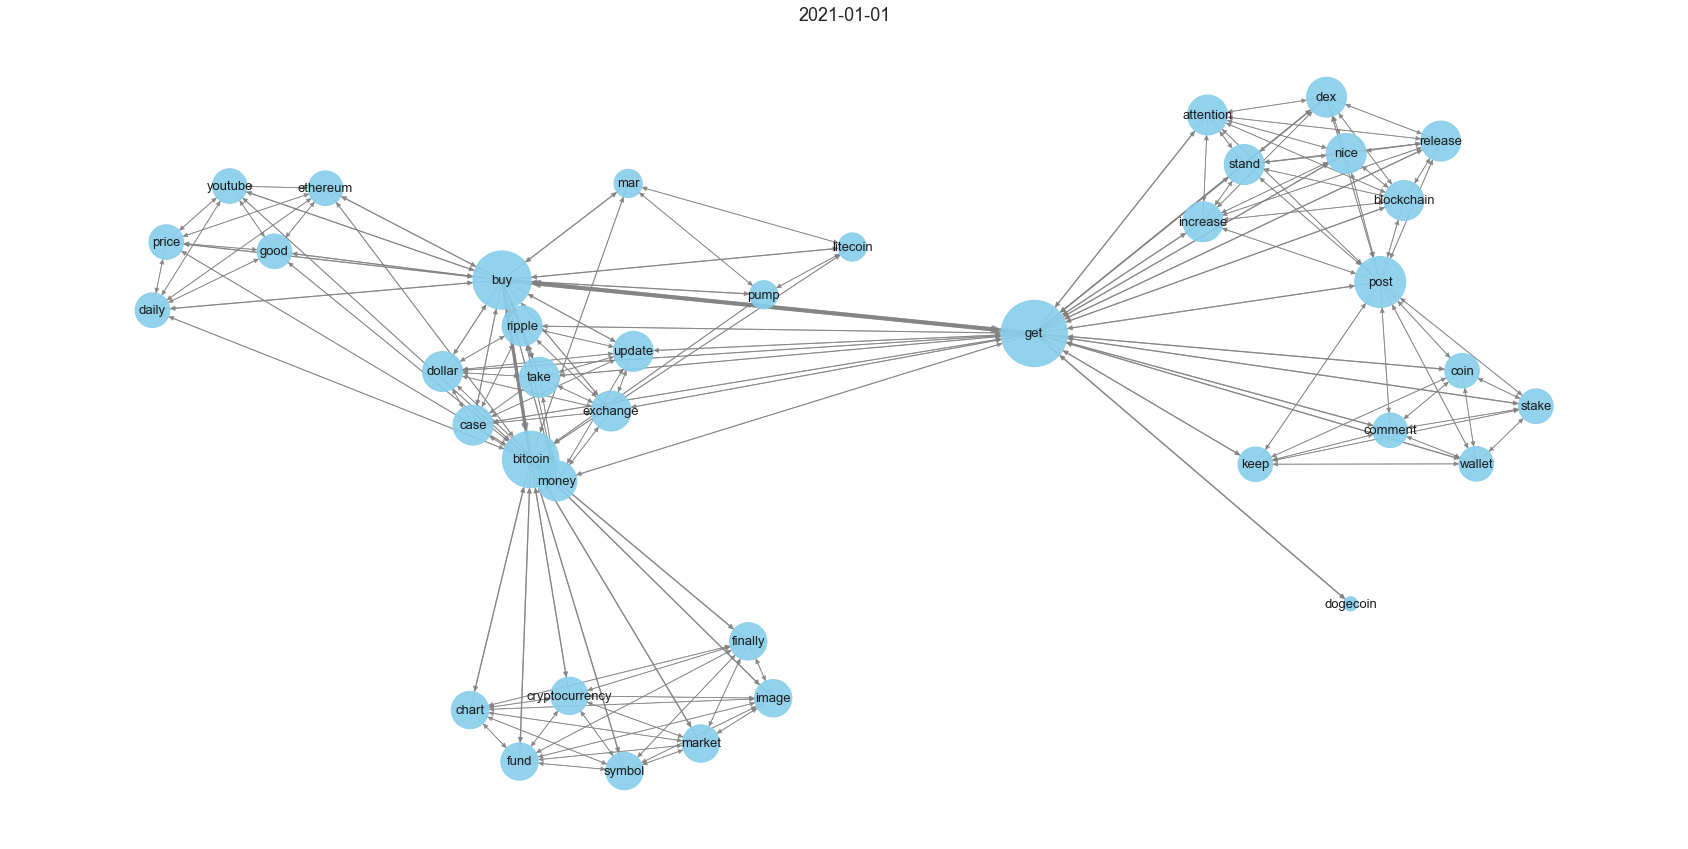

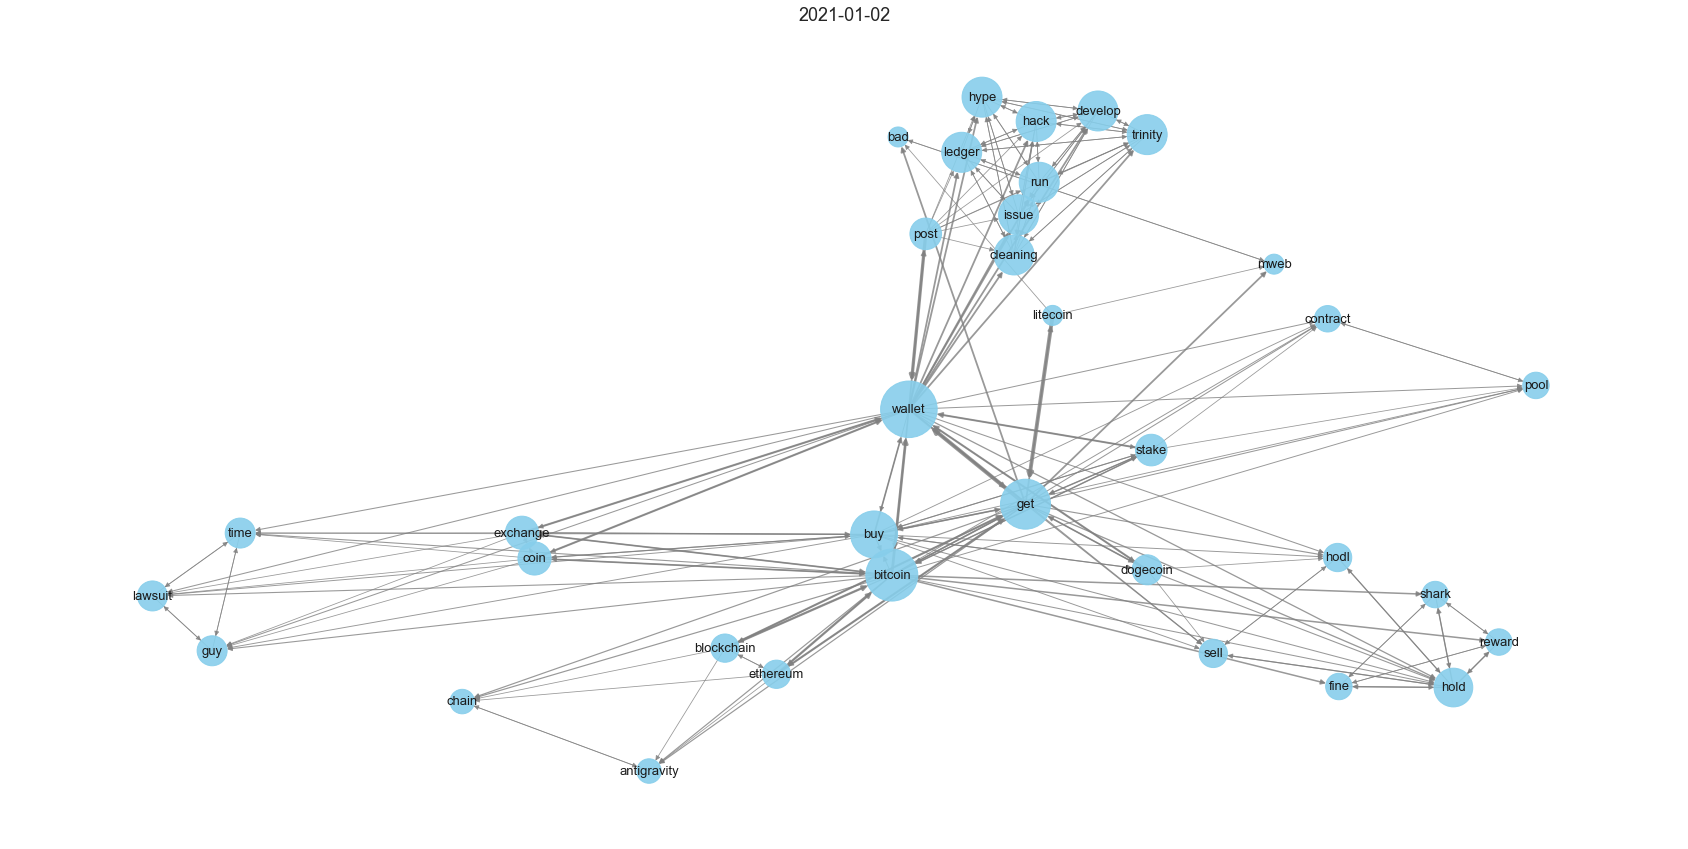

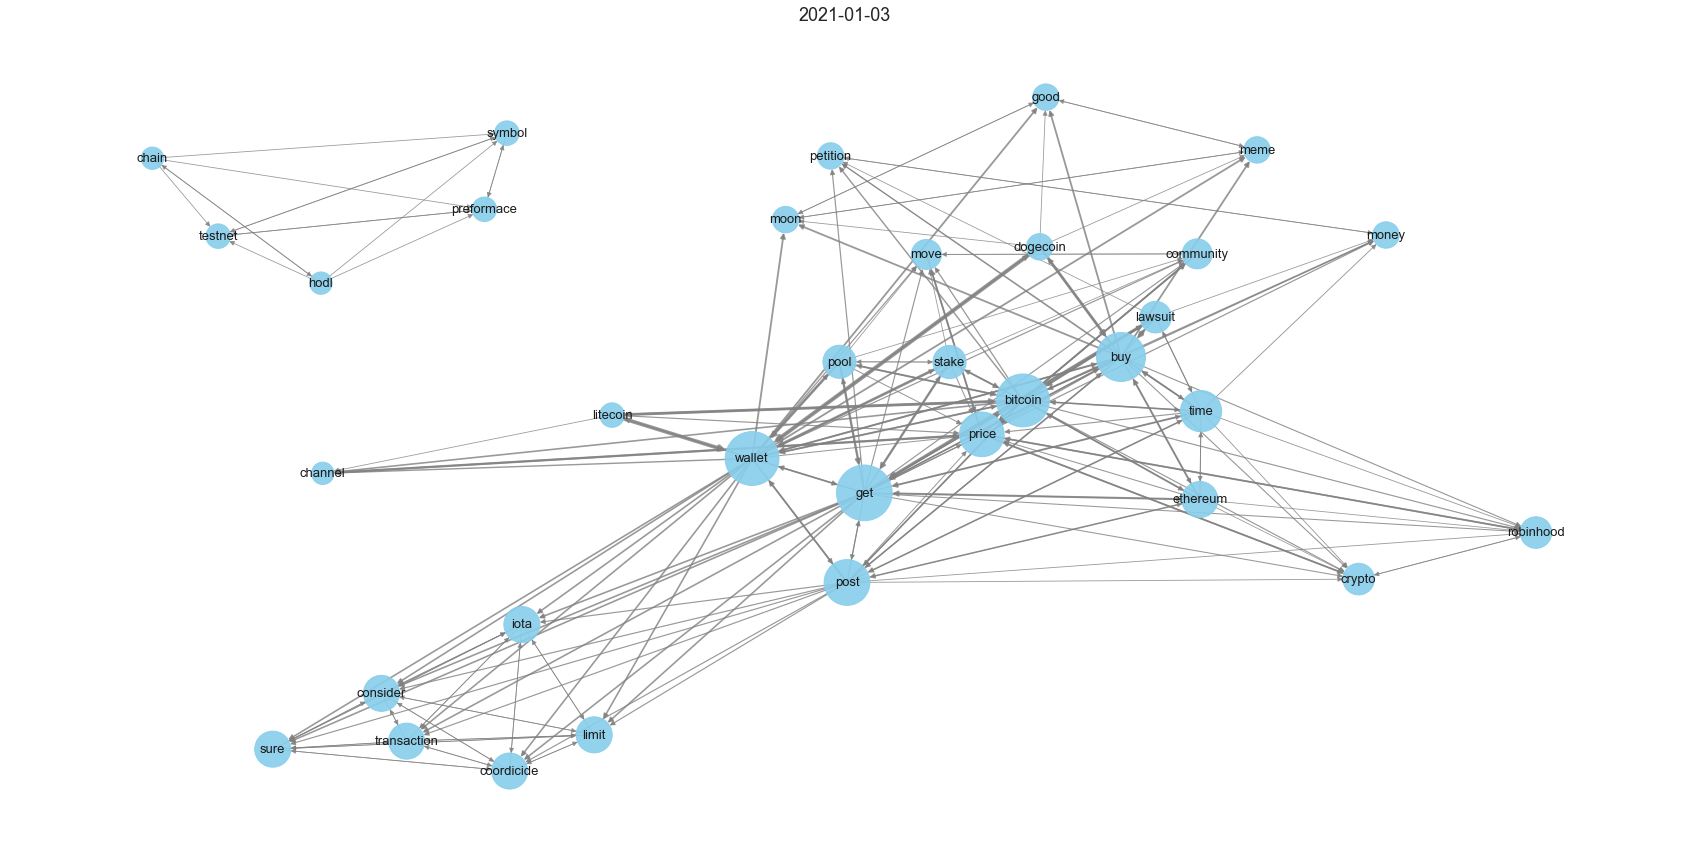

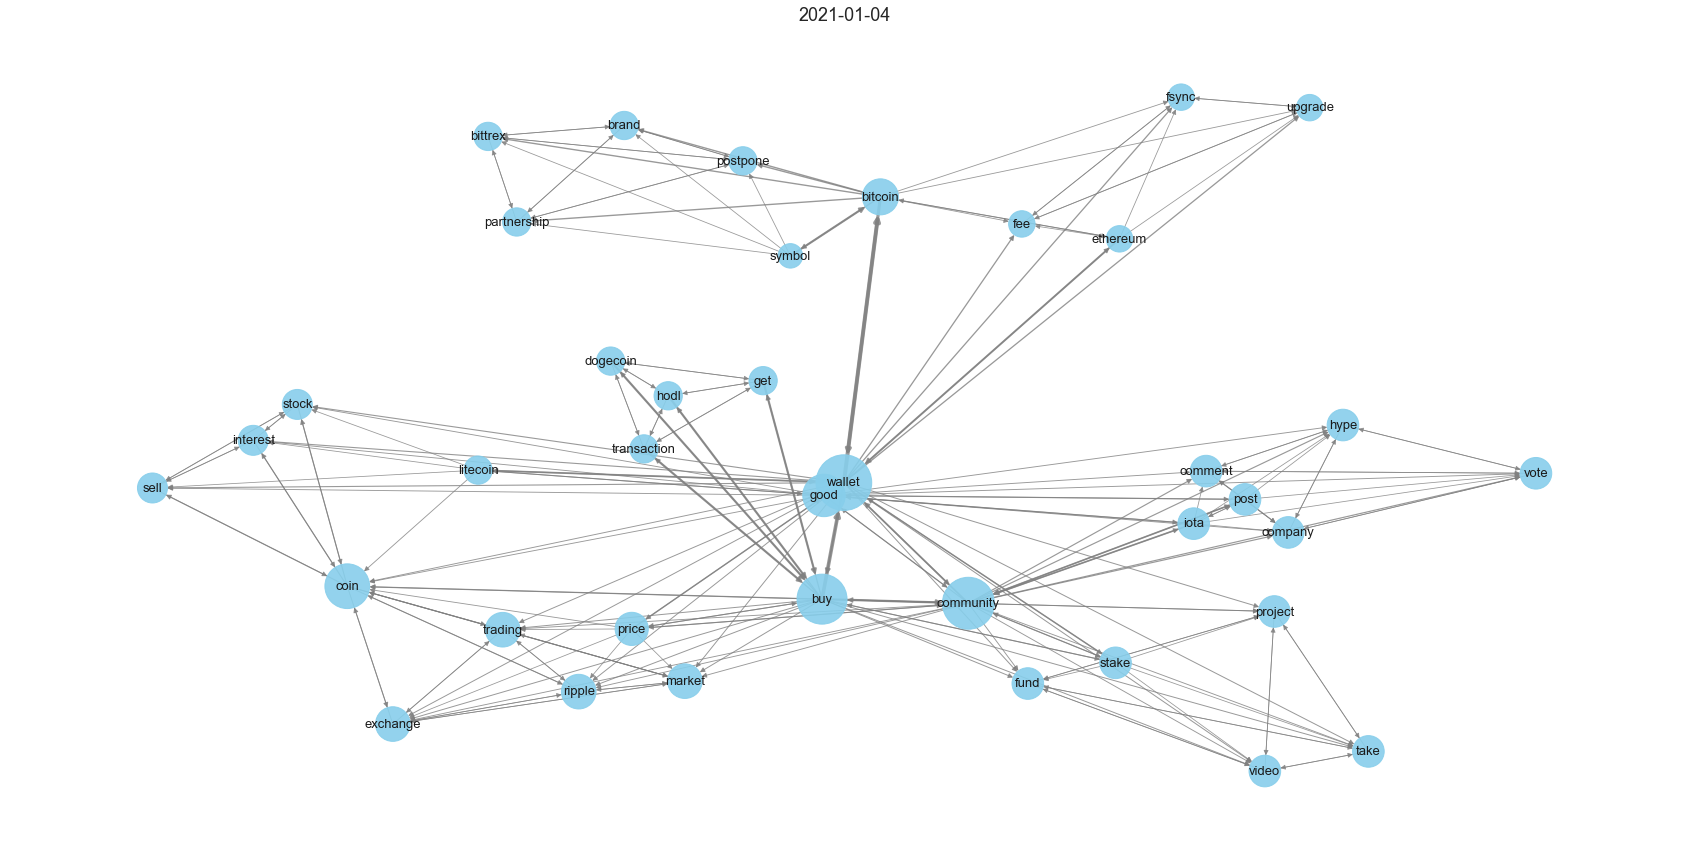

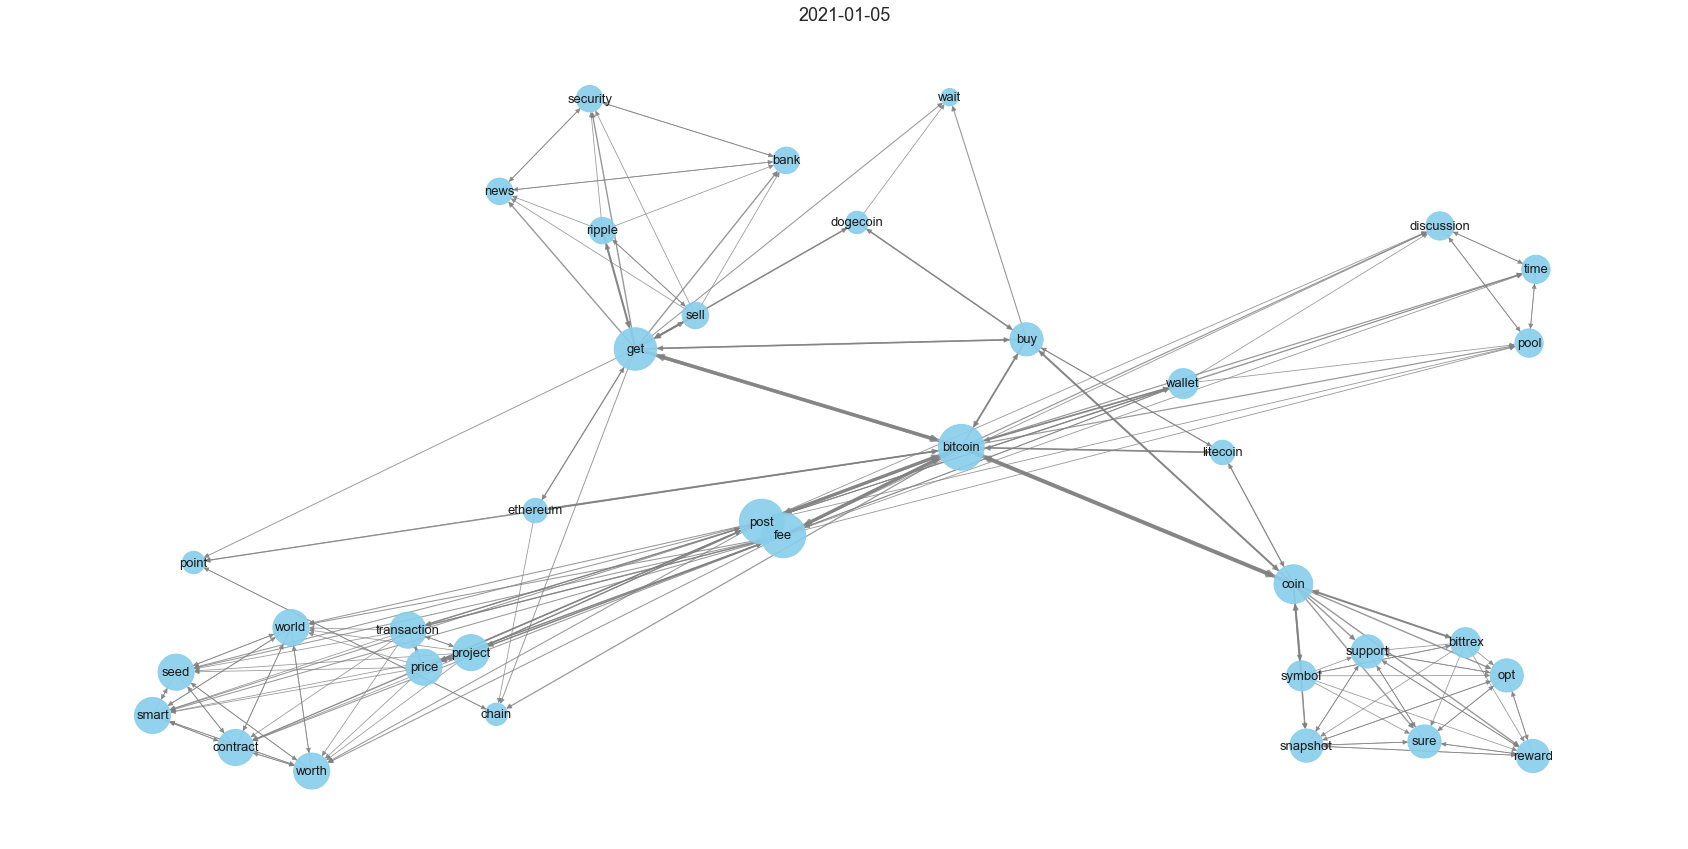

In [788]:
start_date = timespan[0]
end_date = timespan[1]+1
dates = np.arange(start_date, end_date, dtype='datetime64[D]')
t_min = 0.8
t_max = 4

for i in range(5):
    fig = plt.figure(i, figsize=(30, 15))
    plt.axis('off')
    plt.title(dates[i], fontsize = 18)
    pos = nx.spring_layout(G_list[i], k=0.6)
    d = dict(G_list[i].degree)
    
    widths = nx.get_edge_attributes(G_list[i], 'betweenness')
    
    values = widths.values()
    w_min = min(values)
    w_max = max(values)
    
    if w_min == w_max:
        norm_widths = widths
    else:
        norm_widths = {key: ((v - w_min) / (w_max - w_min)) * (t_max - t_min) + t_min  for (key, v) in widths.items()}

    nx.draw_networkx_nodes(G_list[i], pos = pos, node_size =[v * 100 for v in d.values()], with_labels=True, node_color = 'skyblue', alpha = 0.9)
    nx.draw_networkx_edges(G_list[i], pos = pos, width = list(norm_widths.values()), edge_color = 'grey', alpha = 0.8, node_size =[v * 100 for v in d.values()])
    nx.draw_networkx_labels(G_list[i], pos = pos,font_size = 13)
    
    if i < 5:
        plt.savefig('../image_demo_6_months/Network_' + str(dates[i]), dpi = 500)

### • Centrality measure

In [603]:
from collections import OrderedDict
def get_sorted_dict(l):
    first2second = OrderedDict()
    for first, second in l:
        first2second.setdefault(first, []).append(second)
    result = [tuple(v) for v in first2second.values()]
    values = [sum(x) for x in result]
    keys = first2second.keys()
    d = dict(zip(keys, values))
    ranked_dict = dict(sorted(d.items(), key=lambda item: item[1], reverse = True))
    return ranked_dict

#### - Degree centrality -
The degree of a node is the number of other nodes to which it is connected

In [618]:
dc = []
for i in range(num_of_timeframes):
    degree_centrality = nx.degree_centrality(G_list[i])
    dc = dc + sorted(degree_centrality.items(), key=lambda x:x[1], reverse=True)[:3]
    
reshaped_dc = np.reshape(dc, (num_of_timeframes, 6))
df_dc = pd.DataFrame(reshaped_dc)
df_dc.index = dates
for i in range(1, 6, 2):
    df_dc[i] = df_dc[i].astype(float).round(2)

df_dc.rename(columns={0: 'Top 1', 1: 'Degree centrality 1',
                      2: 'Top 2', 3: 'Degree centrality 2',
                      4: 'Top 3', 5: 'Degree centrality 3',}, inplace=True)
df_dc

Top 1  Degree centrality 1      Top 2  Degree centrality 2  \
2021-01-01      get                 1.16        buy                 0.89   
2021-01-02   wallet                 0.94    bitcoin                 0.79   
2021-01-03      get                 0.94     wallet                 0.88   
2021-01-04   wallet                 0.82  community                 0.71   
2021-01-05  bitcoin                 0.60       post                 0.57   
...             ...                  ...        ...                  ...   
2021-06-26     good                 0.70        buy                 0.63   
2021-06-27      get                 0.95       hold                 0.45   
2021-06-28      get                 0.80       many                 0.64   
2021-06-29      get                 0.64      stake                 0.48   
2021-06-30      get                 0.68     wallet                 0.50   

                  Top 3  Degree centrality 3  
2021-01-01      bitcoin                 0.84  
2021-01-02          get                 0.74  
2021-01-03      bitcoin                 0.85  
2021-01-04          buy                 0.66  
2021-01-05          fee                 0.57  
...                 ...                  ...  
2021-06-26          get                 0.60  
2021-06-27          fee                 0.45  
2021-06-28         bank                 0.57  
2021-06-29  transaction                 0.48  
2021-06-30        stake                 0.43  

[181 rows x 6 columns]

In [46]:
dfi.export(df_dc.head(), '../image_demo_6_months/degree_centrality.png')

get    wallet       buy
2021-01-01  1.157895  0.941176  0.894737
2021-01-02  0.735294  0.941176  0.647059
2021-01-03  0.939394  0.878788  0.727273
2021-01-04  0.726840  0.815789  0.657895
2021-01-05  0.514286  0.842105  0.842105
...              ...       ...       ...
2021-06-26  0.604651  0.534884  0.627907
2021-06-27  0.947368  0.526163  0.394737
2021-06-28  0.795455  0.517442  0.399749
2021-06-29  0.642857  0.508721  0.404762
2021-06-30  0.681818  0.500000  0.404762

[181 rows x 3 columns]

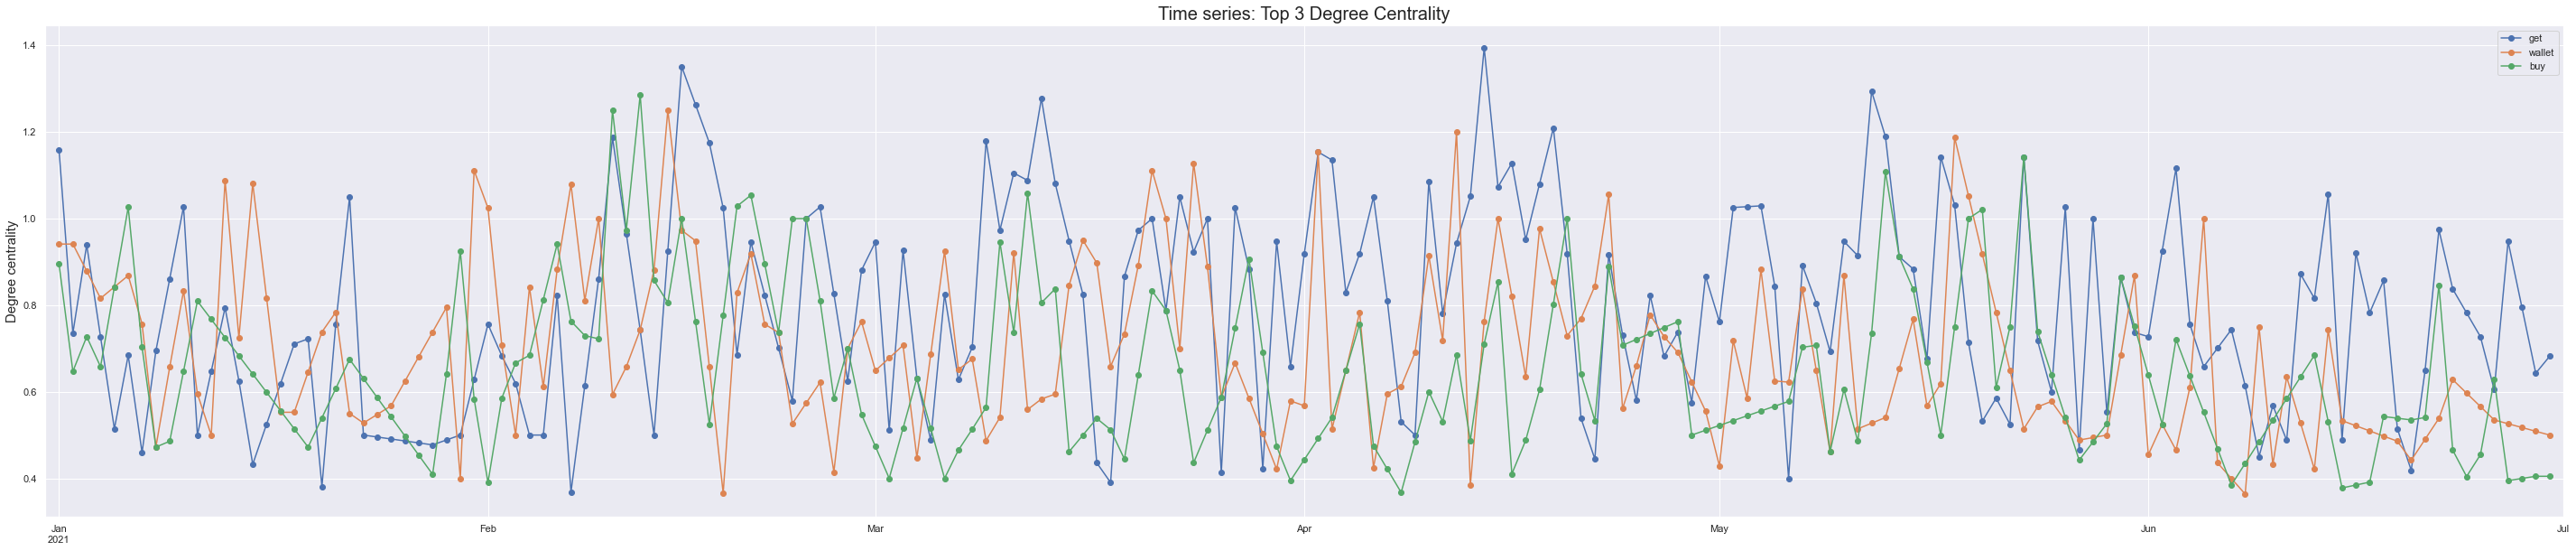

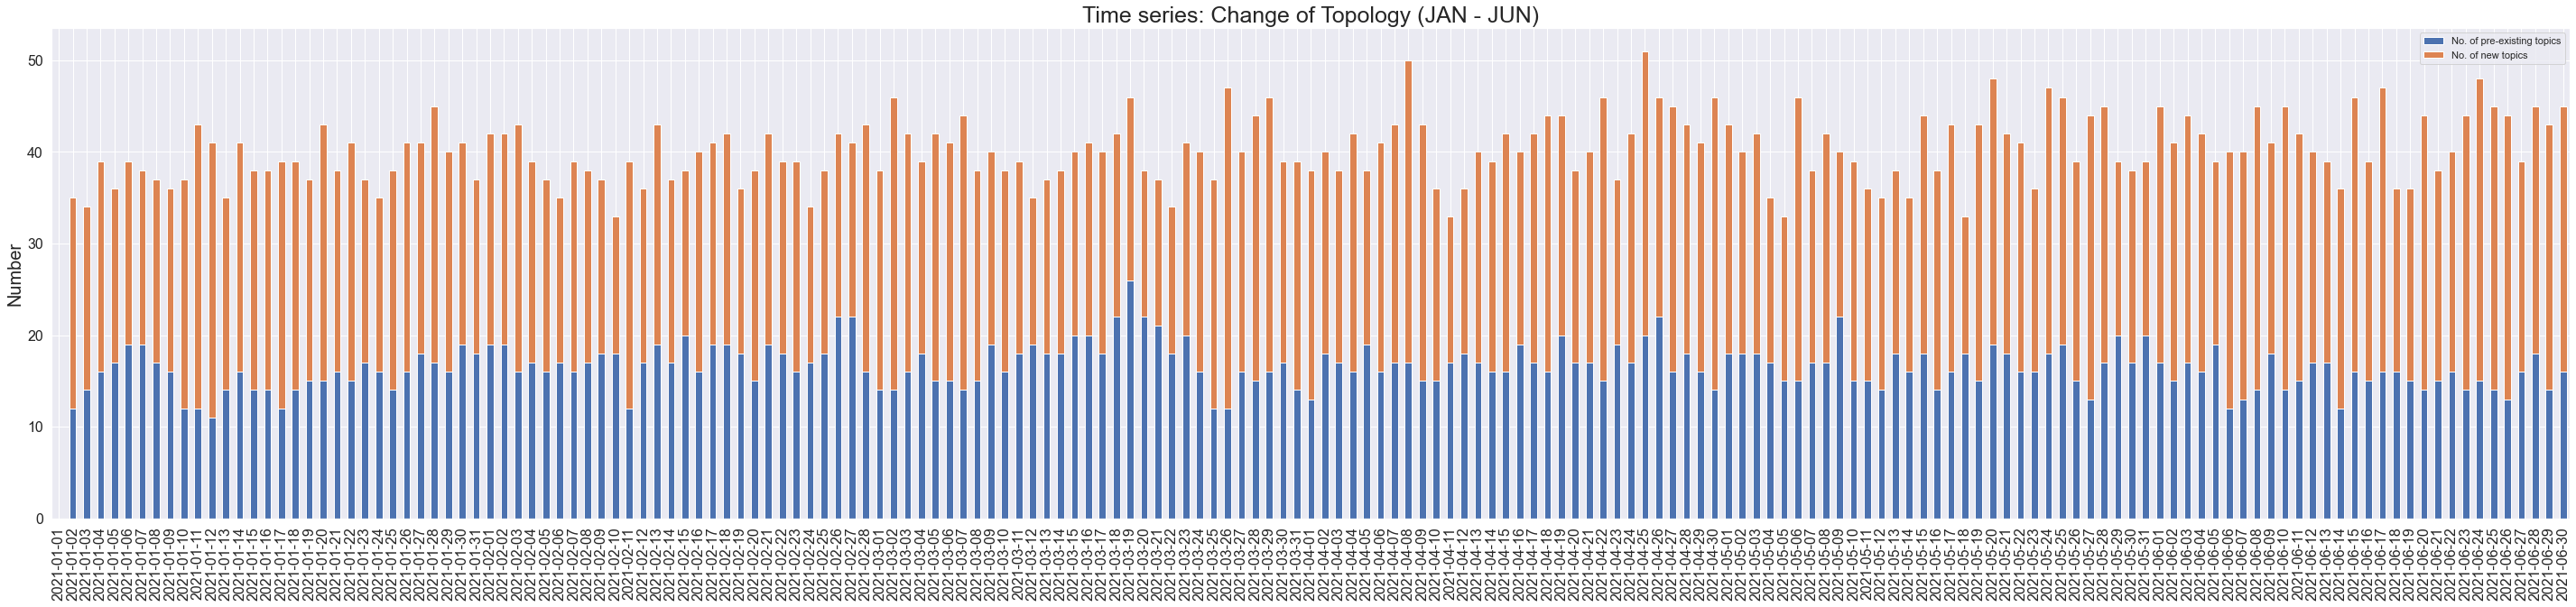

In [801]:
dc = []
for i in range(num_of_timeframes):
    degree_centrality = nx.degree_centrality(G_list[i])
    dc = dc + sorted(degree_centrality.items(), key=lambda x:x[1], reverse=True)[:10]
sorted_dict = get_sorted_dict(dc)
sorted_topics = list(sorted_dict.keys())[:3]

time_series = []
for i in range(len(sorted_topics)):
    for j in range(num_of_timeframes):
        c = dc[j*10 : (j+1)*10]
        t_list, c_list =  zip(*c)
        if sorted_topics[i] in t_list:
            for k in range(10):
                if c[k][0] == sorted_topics[i]:
                    time_series.append(c[k][1])
                    break
        else:
            time_series.append(None)

time_series = np.reshape(time_series, (len(sorted_topics), num_of_timeframes))
df_top_centrality = pd.DataFrame(time_series.T, index=dates, columns=sorted_topics).apply(pd.to_numeric)
df_top_centrality.interpolate(method ='linear', limit_direction ='forward', inplace = True)
df_top_centrality.interpolate(method ='linear', limit_direction ='backward', inplace = True)
ax = df_top_centrality.plot(marker='o')
ax.set_title('Time series: Top 3 Degree Centrality', fontsize=20)
ax.set_ylabel('Degree centrality', fontsize=15)
ax.set_xlim('2020-12-31', '2021-07-01')
time_interval = df_topology.index.to_series().between('2021-01-01', '2021-06-30')
sns.set(rc={'figure.figsize':(50, 10)})
num_plot = ['No. of pre-existing topics', 'No. of new topics']
ax = df_topology[time_interval][num_plot].plot.bar(stacked = True)
# ax = df_time_series.plot.bar(stacked = False)
ax.set_title('Time series: Change of Topology (JAN - JUN)', fontsize=25)
ax.set_ylabel('Number', fontsize=20)
x_dates = df_topology[time_interval].index.strftime('%Y-%m-%d')
plt.yticks(fontsize = 16)
ax.set_xticklabels(labels=x_dates, fontsize = 16)
plt.savefig('../image_demo_6_months/Time series barplot 1-2.png', dpi = 500)
df_top_centrality

==============================================================================================================================================

#### - Betweenness centrality -
Betweenness centrality quantifies the number of times a node acts as a bridge(or "broker") along the shortest path between two other nodes.

In [556]:
bc = []
for i in range(num_of_timeframes):
    betweenness_centrality = nx.betweenness_centrality(G_list[i])
    bc = bc + sorted(betweenness_centrality.items(), key=lambda x:x[1], reverse=True)[:3]
    
bc = np.reshape(bc, (num_of_timeframes, 6))
df_bc = pd.DataFrame(bc)
df_bc.index = dates
for i in range(1, 6, 2):
    df_bc[i] = df_bc[i].astype(float).round(2)

df_bc.rename(columns={0: 'Top 1', 1: 'Betweenness centrality 1',
                      2: 'Top 2', 3: 'Betweenness centrality 2',
                      4: 'Top 3', 5: 'Betweenness centrality 3',}, inplace=True)
df_bc

Top 1  Betweenness centrality 1   Top 2  \
2021-01-01          get                      0.52     buy   
2021-01-02       wallet                      0.12     get   
2021-01-03       wallet                      0.06     get   
2021-01-04       wallet                      0.18     buy   
2021-01-05      bitcoin                      0.26    coin   
...                 ...                       ...     ...   
2021-06-26       wallet                      0.09     get   
2021-06-27          get                      0.19     fee   
2021-06-28          get                      0.22    many   
2021-06-29  transaction                      0.10     get   
2021-06-30          get                      0.13  wallet   

            Betweenness centrality 2      Top 3  Betweenness centrality 3  
2021-01-01                      0.51    bitcoin                      0.32  
2021-01-02                      0.09    bitcoin                      0.07  
2021-01-03                      0.04    bitcoin                      0.04  
2021-01-04                      0.13  community                      0.08  
2021-01-05                      0.13        get                      0.13  
...                              ...        ...                       ...  
2021-06-26                      0.08       good                      0.08  
2021-06-27                      0.04        gas                      0.04  
2021-06-28                      0.19        guy                      0.15  
2021-06-29                      0.09        buy                      0.04  
2021-06-30                      0.07   dogecoin                      0.06  

[181 rows x 6 columns]

In [111]:
dfi.export(df_bc.head(), '../image_demo_6_months/betweenness_centrality.png')

get    wallet       buy
2021-01-01  0.521337  0.119652  0.511380
2021-01-02  0.086824  0.119652  0.017157
2021-01-03  0.040546  0.055871  0.030761
2021-01-04  0.000000  0.179232  0.130631
2021-01-05  0.127311  0.127726  0.047899
...              ...       ...       ...
2021-06-26  0.080565  0.085271  0.043466
2021-06-27  0.190256  0.107382  0.013514
2021-06-28  0.221987  0.129493  0.025921
2021-06-29  0.086818  0.100687  0.038328
2021-06-30  0.130550  0.071882  0.038328

[181 rows x 3 columns]

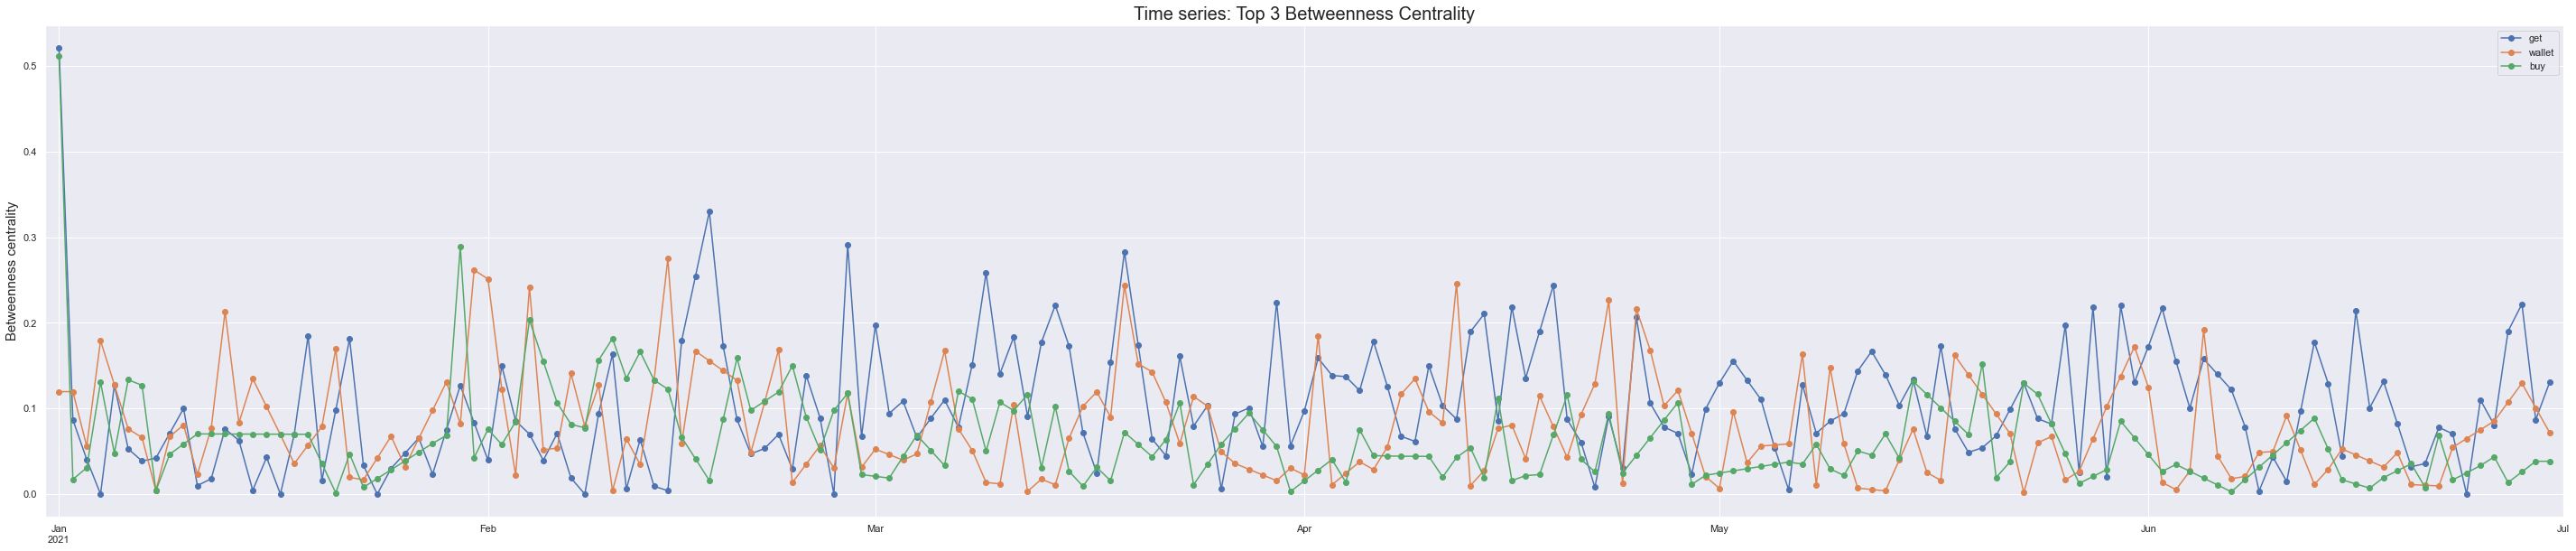

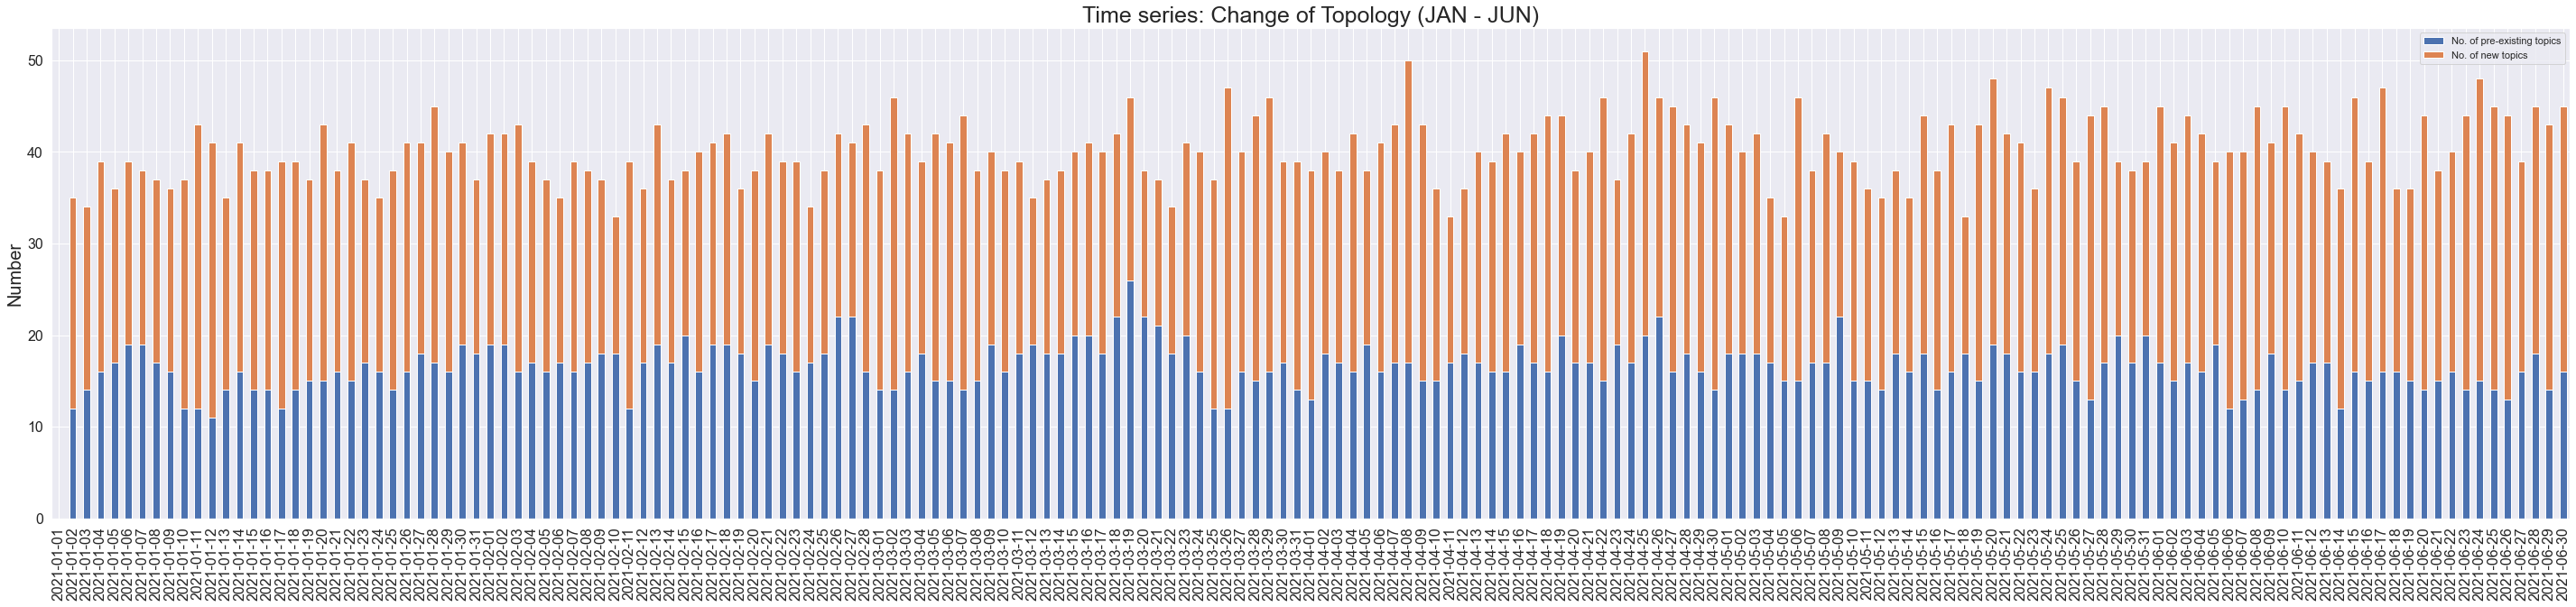

In [802]:
bc = []
for i in range(num_of_timeframes):
    betweenness_centrality = nx.betweenness_centrality(G_list[i])
    bc = bc + sorted(betweenness_centrality.items(), key=lambda x:x[1], reverse=True)[:10]
sorted_dict = get_sorted_dict(bc)
sorted_topics = list(sorted_dict.keys())[:3]

time_series = []
for i in range(len(sorted_topics)):
    for j in range(num_of_timeframes):
        c = bc[j*10 : (j+1)*10]
        t_list, c_list =  zip(*c)
        if sorted_topics[i] in t_list:
            for k in range(10):
                if c[k][0] == sorted_topics[i]:
                    time_series.append(c[k][1])
                    break
        else:
            time_series.append(None)

time_series = np.reshape(time_series, (len(sorted_topics), num_of_timeframes))
df_top_centrality = pd.DataFrame(time_series.T, index=dates, columns=sorted_topics).apply(pd.to_numeric)
df_top_centrality.interpolate(method ='linear', limit_direction ='forward', inplace = True)
df_top_centrality.interpolate(method ='linear', limit_direction ='backward', inplace = True)
ax = df_top_centrality.plot(marker='o')
ax.set_title('Time series: Top 3 Betweenness Centrality', fontsize=20)
ax.set_ylabel('Betweenness centrality', fontsize=15)
ax.set_xlim('2020-12-31', '2021-07-01')
time_interval = df_topology.index.to_series().between('2021-01-01', '2021-06-30')
sns.set(rc={'figure.figsize':(50, 10)})
num_plot = ['No. of pre-existing topics', 'No. of new topics']
ax = df_topology[time_interval][num_plot].plot.bar(stacked = True)
# ax = df_time_series.plot.bar(stacked = False)
ax.set_title('Time series: Change of Topology (JAN - JUN)', fontsize=25)
ax.set_ylabel('Number', fontsize=20)
x_dates = df_topology[time_interval].index.strftime('%Y-%m-%d')
plt.yticks(fontsize = 16)
ax.set_xticklabels(labels=x_dates, fontsize = 16)
plt.savefig('../image_demo_6_months/Time series barplot 1-2.png', dpi = 500)
df_top_centrality

#### - In degree centrality -

In [560]:
idc = []
for i in range(num_of_timeframes):
    in_degree_centrality = G_list[i].in_degree()
    idc = idc + sorted(in_degree_centrality, key=lambda x:x[1], reverse=True)[:3]

idc = np.reshape(idc, (num_of_timeframes, 6))
df_idc = pd.DataFrame(idc)
df_idc.index = dates
for i in range(1, 6, 2):
    df_idc[i] = df_idc[i].astype(float).round(2)

df_idc.rename(columns={0: 'Top 1', 1: 'In Degree centrality 1',
                      2: 'Top 2', 3: 'In Degree centrality 2',
                      4: 'Top 3', 5: 'In Degree centrality 3',}, inplace=True)
df_idc

Top 1  In Degree centrality 1          Top 2  \
2021-01-01       get                    22.0            buy   
2021-01-02      hold                    10.0          issue   
2021-01-03     price                    15.0        bitcoin   
2021-01-04      coin                    13.0       exchange   
2021-01-05  contract                     9.0          world   
...              ...                     ...            ...   
2021-06-26      wait                     9.0  documentation   
2021-06-27       get                    13.0           hold   
2021-06-28      many                    16.0           bank   
2021-06-29  investor                     9.0          green   
2021-06-30       get                    11.0           loan   

            In Degree centrality 2    Top 3  In Degree centrality 3  
2021-01-01                    17.0  bitcoin                    16.0  
2021-01-02                     9.0      run                     9.0  
2021-01-03                    10.0      get                     9.0  
2021-01-04                     8.0   ripple                     8.0  
2021-01-05                     9.0    smart                     9.0  
...                            ...      ...                     ...  
2021-06-26                     9.0      ask                     9.0  
2021-06-27                    12.0  already                     8.0  
2021-06-28                    15.0      day                    13.0  
2021-06-29                     9.0      get                     9.0  
2021-06-30                     8.0   ledger                     8.0  

[181 rows x 6 columns]

get  wallet   buy
2021-01-01  22.000000     8.0  17.0
2021-01-02   8.000000     8.0  12.5
2021-01-03   9.000000     8.0   8.0
2021-01-04   9.666667     8.0   8.0
2021-01-05  10.333333    10.0  10.5
...               ...     ...   ...
2021-06-26  11.000000    14.0   9.0
2021-06-27  13.000000    14.0   9.0
2021-06-28   9.000000    14.0   9.0
2021-06-29   9.000000    14.0   9.0
2021-06-30  11.000000    14.0   9.0

[181 rows x 3 columns]

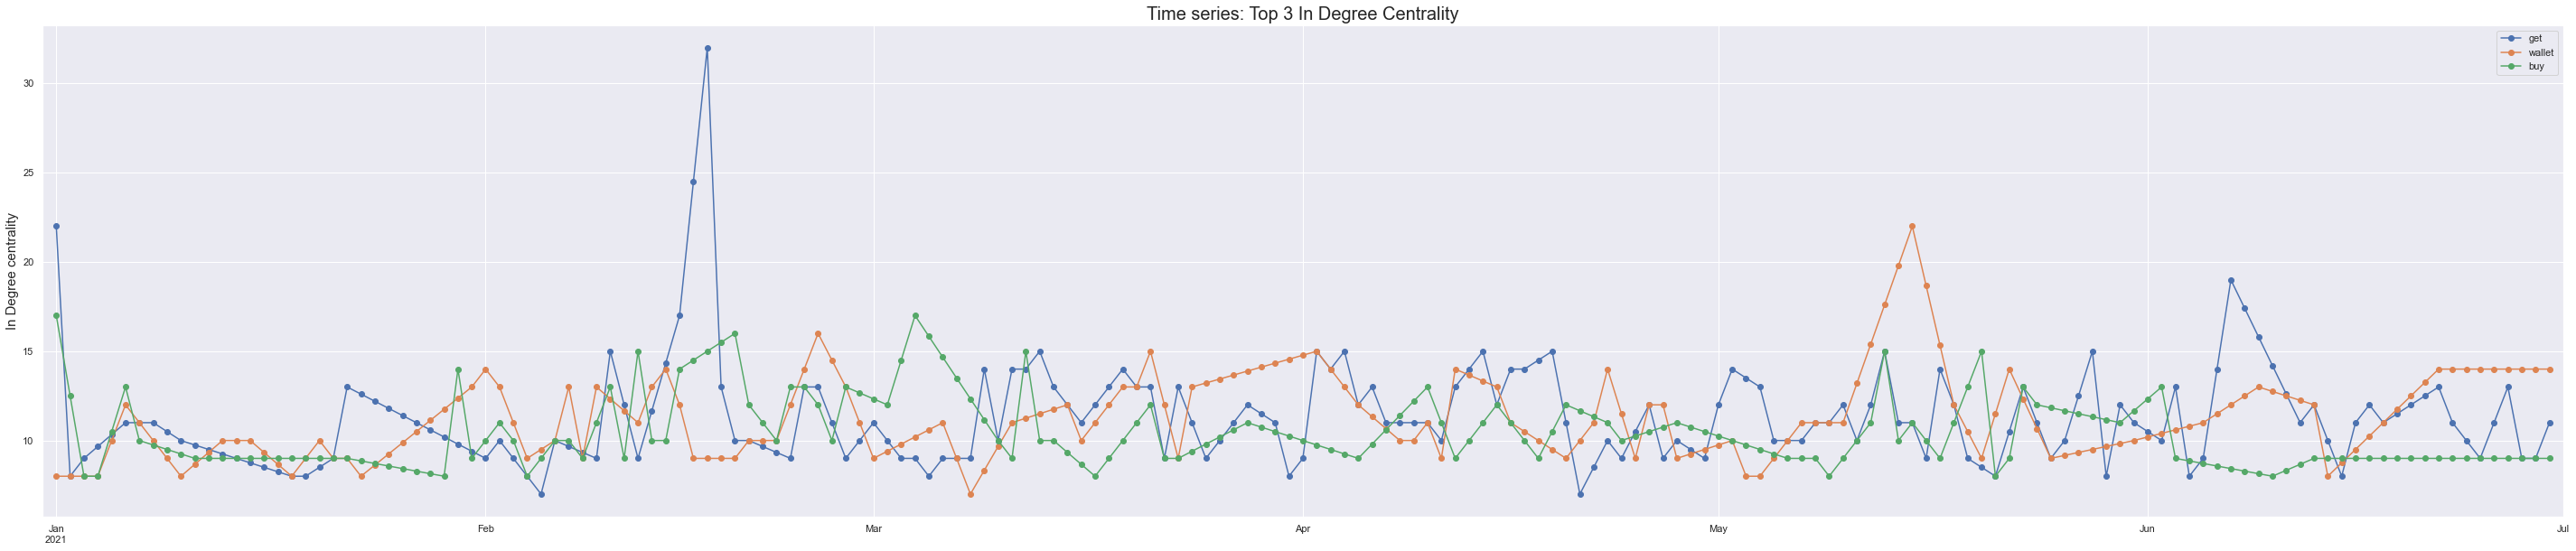

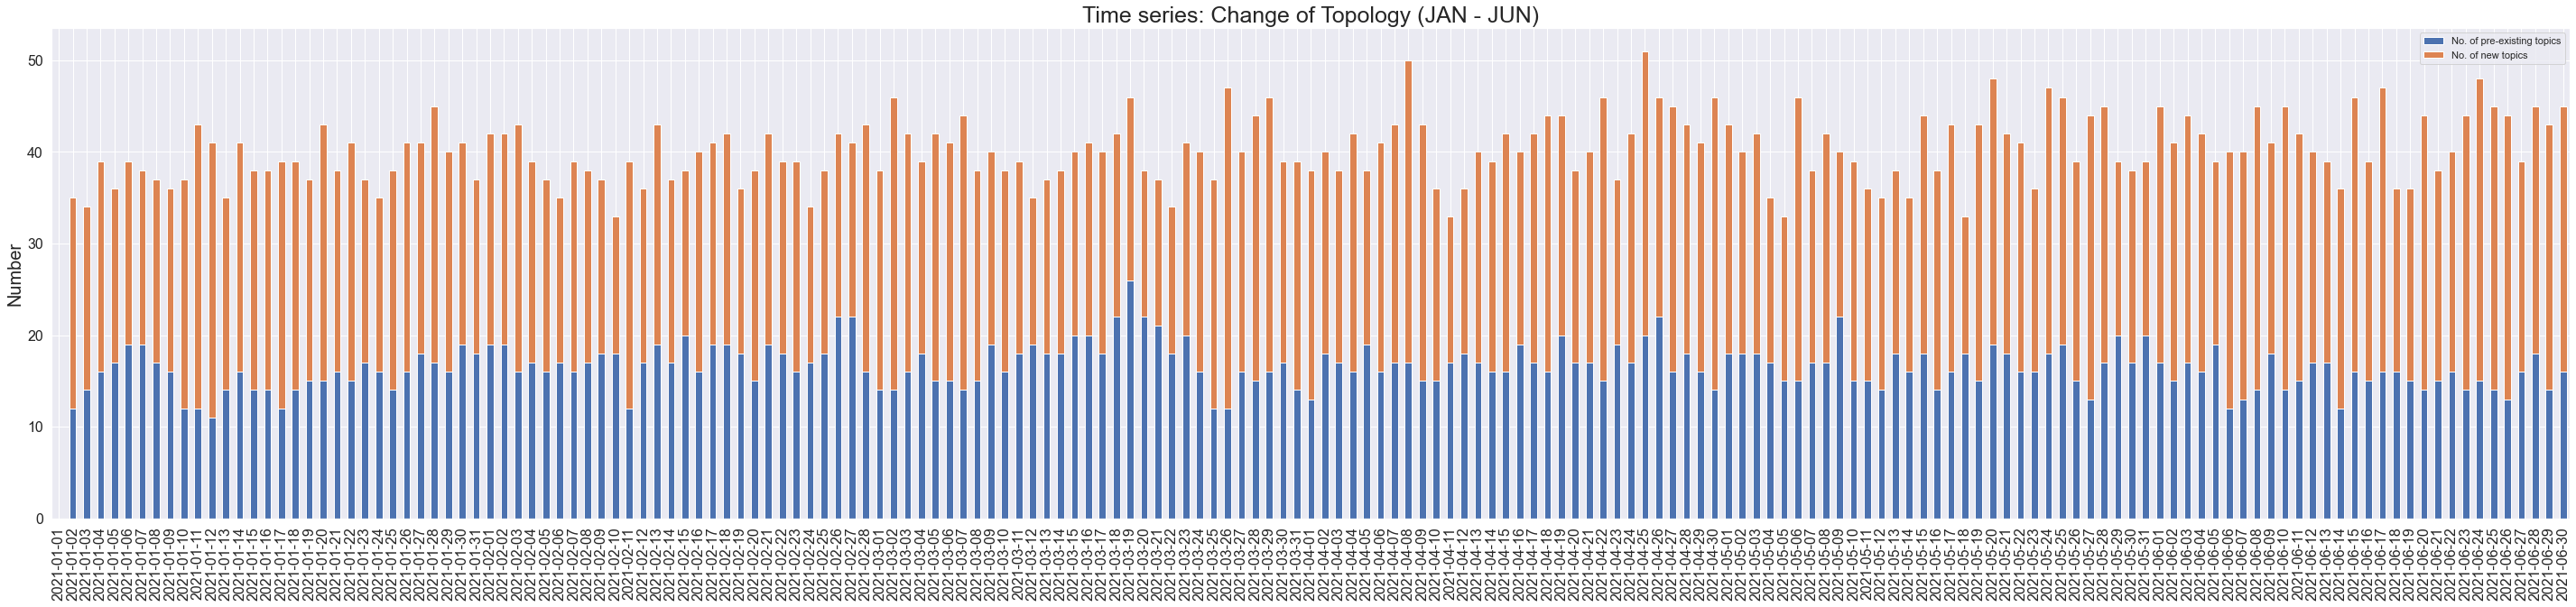

In [803]:
idc = []
for i in range(num_of_timeframes):
    in_degree_centrality = G_list[i].in_degree()
    idc = idc + sorted(in_degree_centrality, key=lambda x:x[1], reverse=True)[:10]
sorted_dict = get_sorted_dict(idc)
sorted_topics = list(sorted_dict.keys())[:3]

time_series = []
for i in range(len(sorted_topics)):
    for j in range(num_of_timeframes):
        c = idc[j*10 : (j+1)*10]
        t_list, c_list =  zip(*c)
        if sorted_topics[i] in t_list:
            for k in range(10):
                if c[k][0] == sorted_topics[i]:
                    time_series.append(c[k][1])
                    break
        else:
            time_series.append(None)

time_series = np.reshape(time_series, (len(sorted_topics), num_of_timeframes))
df_top_centrality = pd.DataFrame(time_series.T, index=dates, columns=sorted_topics).apply(pd.to_numeric)
df_top_centrality.interpolate(method ='linear', limit_direction ='forward', inplace = True)
df_top_centrality.interpolate(method ='linear', limit_direction ='backward', inplace = True)
ax = df_top_centrality.plot(marker='o')
ax.set_title('Time series: Top 3 In Degree Centrality', fontsize=20)
ax.set_ylabel('In Degree centrality', fontsize=15)
ax.set_xlim('2020-12-31', '2021-07-01')
time_interval = df_topology.index.to_series().between('2021-01-01', '2021-06-30')
sns.set(rc={'figure.figsize':(50, 10)})
num_plot = ['No. of pre-existing topics', 'No. of new topics']
ax = df_topology[time_interval][num_plot].plot.bar(stacked = True)
# ax = df_time_series.plot.bar(stacked = False)
ax.set_title('Time series: Change of Topology (JAN - JUN)', fontsize=25)
ax.set_ylabel('Number', fontsize=20)
x_dates = df_topology[time_interval].index.strftime('%Y-%m-%d')
plt.yticks(fontsize = 16)
ax.set_xticklabels(labels=x_dates, fontsize = 16)
plt.savefig('../image_demo_6_months/Time series barplot 1-2.png', dpi = 500)
df_top_centrality


In [743]:
df_time_series = df_topology[time_interval][num_plot]
df_time_series['Topic: get'] = df_top_centrality['get']

In [745]:
df_time_series

No. of new topics  No. of pre-existing topics  Topic: get
2021-01-01                  0                           0        22.0
2021-01-02                 23                          12        17.0
2021-01-03                 20                          14        22.0
2021-01-04                 23                          16        17.0
2021-01-05                 19                          17        12.0
...                       ...                         ...         ...
2021-06-26                 31                          13        18.0
2021-06-27                 23                          16        23.0
2021-06-28                 27                          18        26.0
2021-06-29                 29                          14        18.0
2021-06-30                 29                          16        19.0

[181 rows x 3 columns]

In [795]:
# time_interval = df_topology.index.to_series().between('2021-01-01', '2021-06-30')
# sns.set(rc={'figure.figsize':(50, 10)})
# num_plot = ['No. of pre-existing topics', 'No. of new topics']
# # ax = df_topology[time_interval][num_plot].plot.bar(stacked = True)
# ax = df_time_series.plot.bar(stacked = True)
# ax.set_title('Time series: Change of Topology (JAN - JUN)', fontsize=25)
# ax.set_ylabel('Number', fontsize=20)
# x_dates = df_topology[time_interval].index.strftime('%Y-%m-%d')
# plt.yticks(fontsize = 16)
# ax.set_xticklabels(labels=x_dates, fontsize = 16)
# plt.savefig('../image_demo_6_months/Time series barplot 1-2.png', dpi = 500)

#### - Out degree centrality -

In [559]:
odc = []
for i in range(num_of_timeframes):
    out_degree_centrality = G_list[i].out_degree()
    odc = odc + sorted(out_degree_centrality, key=lambda x:x[1], reverse=True)[:3]

odc = np.reshape(odc, (num_of_timeframes, 6))
df_odc = pd.DataFrame(odc)
df_odc.index = dates
for i in range(1, 6, 2):
    df_odc[i] = df_odc[i].astype(float).round(2)

df_odc.rename(columns={0: 'Top 1', 1: 'In Degree centrality 1',
                      2: 'Top 2', 3: 'In Degree centrality 2',
                      4: 'Top 3', 5: 'In Degree centrality 3',}, inplace=True)
df_odc

Top 1  In Degree centrality 1      Top 2  In Degree centrality 2  \
2021-01-01     get                    22.0        buy                    17.0   
2021-01-02  wallet                    24.0    bitcoin                    19.0   
2021-01-03     get                    22.0     wallet                    21.0   
2021-01-04  wallet                    23.0  community                    20.0   
2021-01-05    post                    14.0        fee                    14.0   
...            ...                     ...        ...                     ...   
2021-06-26    good                    22.0        buy                    20.0   
2021-06-27     get                    23.0        fee                    12.0   
2021-06-28     get                    26.0       many                    12.0   
2021-06-29     get                    18.0        buy                    15.0   
2021-06-30     get                    19.0     wallet                    15.0   

                  Top 3  In Degree centrality 3  
2021-01-01      bitcoin                    16.0  
2021-01-02          get                    17.0  
2021-01-03      bitcoin                    18.0  
2021-01-04          buy                    17.0  
2021-01-05      bitcoin                    13.0  
...                 ...                     ...  
2021-06-26          get                    18.0  
2021-06-27          gas                    12.0  
2021-06-28         bank                    10.0  
2021-06-29  transaction                    14.0  
2021-06-30     dogecoin                    14.0  

[181 rows x 6 columns]

get  wallet   buy
2021-01-01  22.0    24.0  17.0
2021-01-02  17.0    24.0  15.0
2021-01-03  22.0    21.0  16.0
2021-01-04  17.0    23.0  17.0
2021-01-05  12.0    22.0  21.5
...          ...     ...   ...
2021-06-26  18.0    18.0  20.0
2021-06-27  23.0    13.5   9.0
2021-06-28  26.0     9.0  12.0
2021-06-29  18.0     8.0  15.0
2021-06-30  19.0    15.0   7.0

[181 rows x 3 columns]

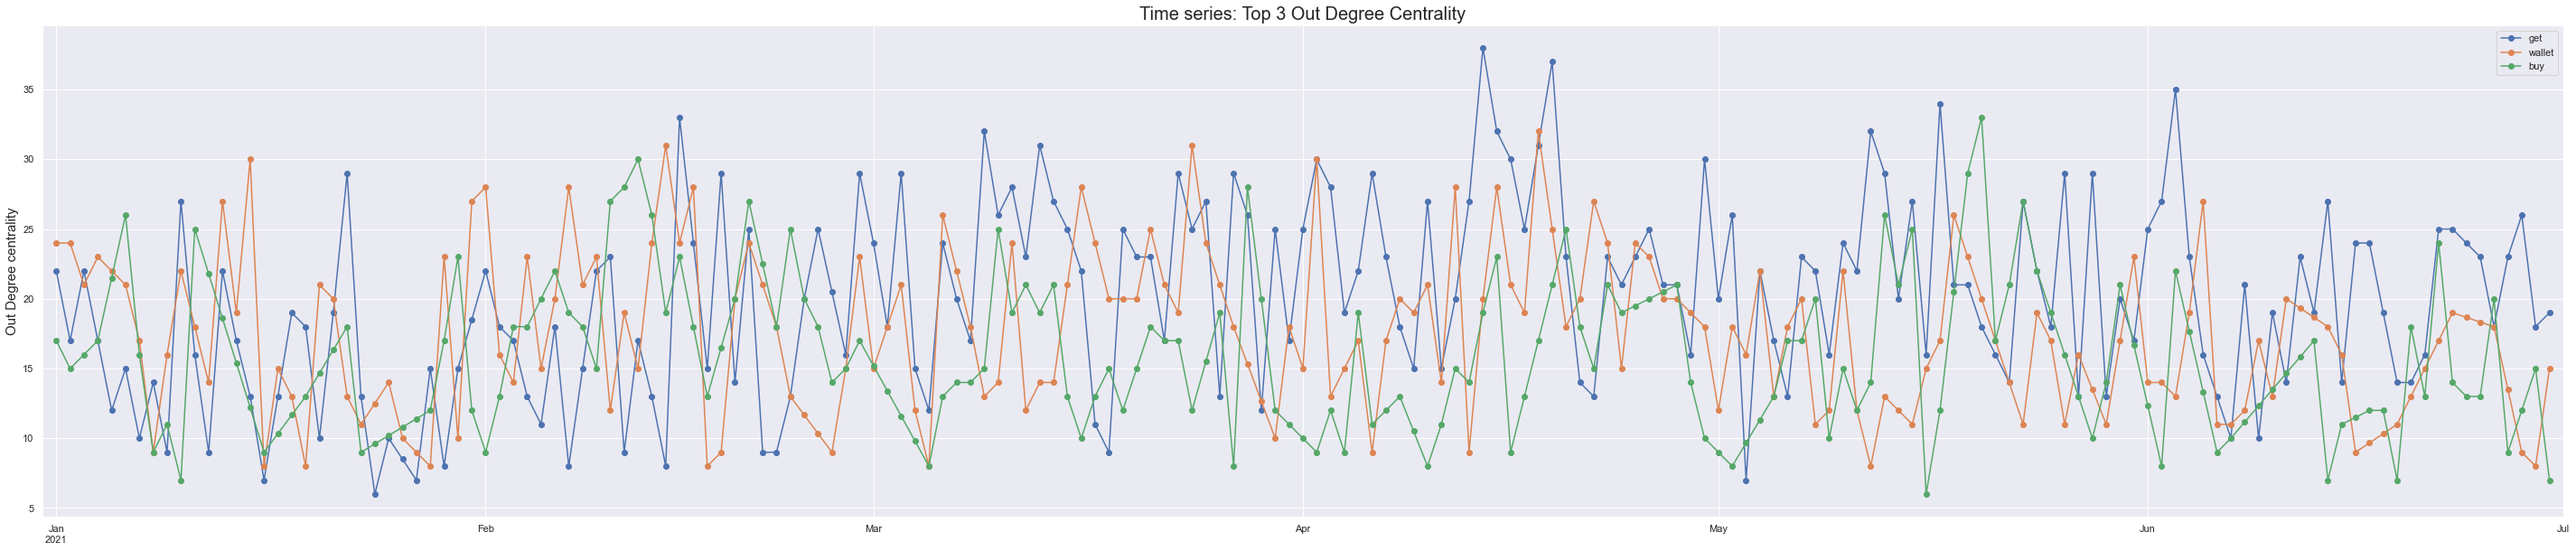

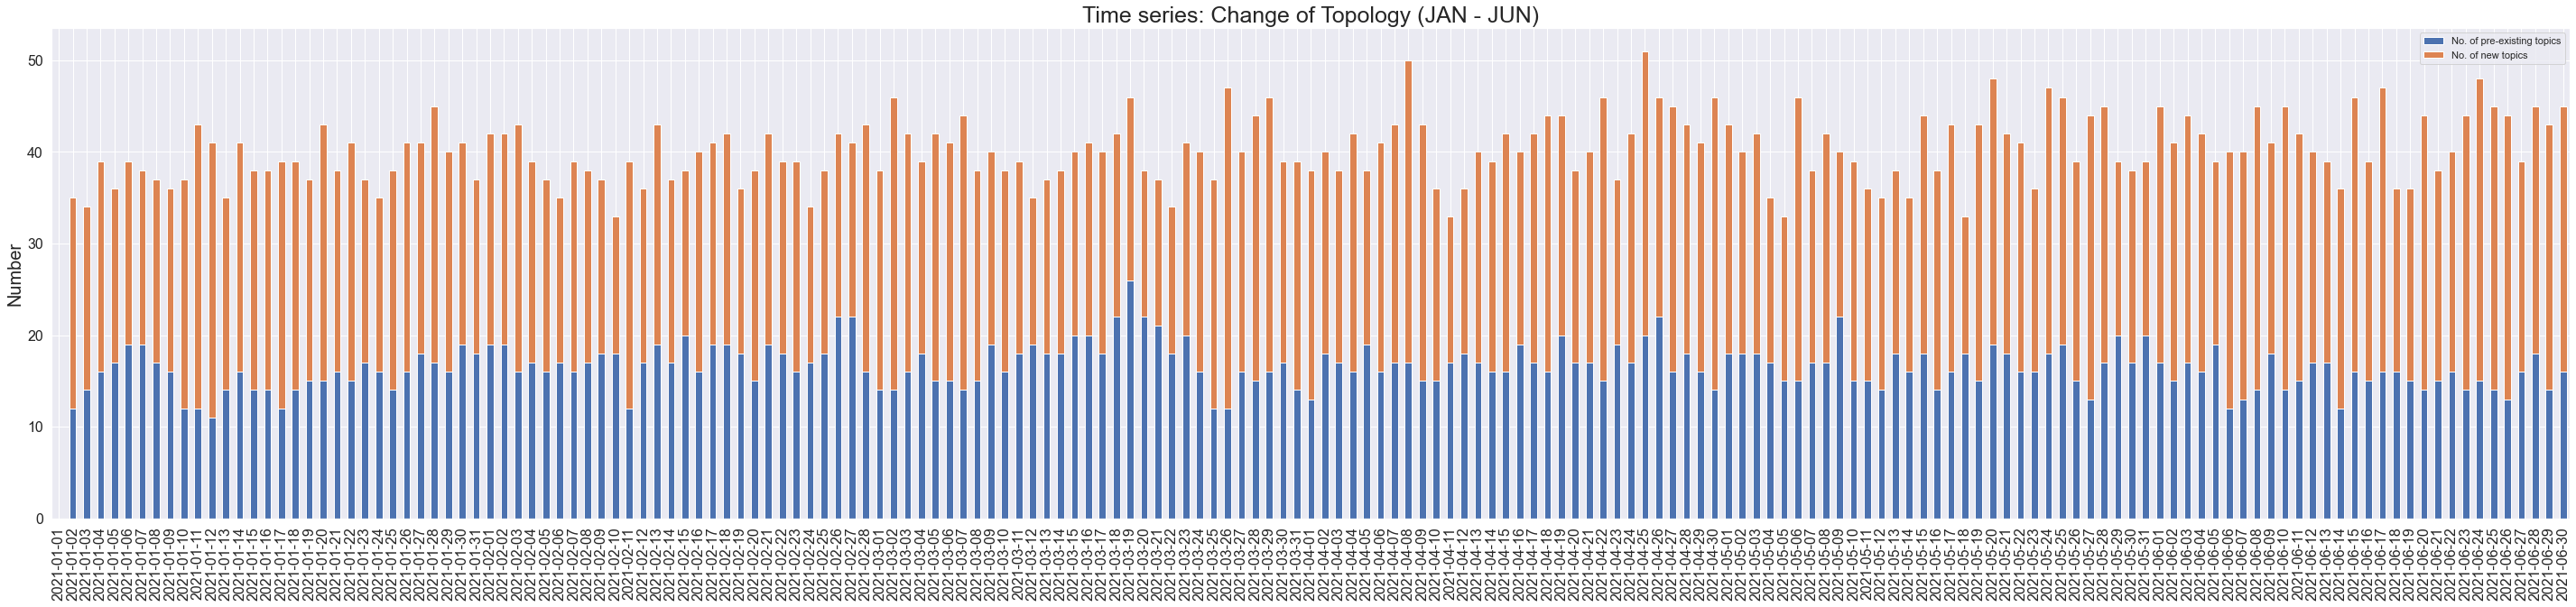

In [808]:
odc = []
for i in range(num_of_timeframes):
    out_degree_centrality = G_list[i].out_degree()
    odc = odc + sorted(out_degree_centrality, key=lambda x:x[1], reverse=True)[:10]

sorted_dict = get_sorted_dict(odc)
sorted_topics = list(sorted_dict.keys())[:3]

time_series = []
for i in range(len(sorted_topics)):
    for j in range(num_of_timeframes):
        c = odc[j*10 : (j+1)*10]
        t_list, c_list =  zip(*c)
        if sorted_topics[i] in t_list:
            for k in range(10):
                if c[k][0] == sorted_topics[i]:
                    time_series.append(c[k][1])
                    break
        else:
            time_series.append(None)

time_series = np.reshape(time_series, (len(sorted_topics), num_of_timeframes))
df_top_centrality = pd.DataFrame(time_series.T, index=dates, columns=sorted_topics).apply(pd.to_numeric)
df_top_centrality.interpolate(method ='linear', limit_direction ='forward', inplace = True)
df_top_centrality.interpolate(method ='linear', limit_direction ='backward', inplace = True)
ax = df_top_centrality.plot(marker='o')
ax.set_title('Time series: Top 3 Out Degree Centrality', fontsize=20)
ax.set_ylabel('Out Degree centrality', fontsize=15)
ax.set_xlim('2020-12-31', '2021-07-01')

time_interval = df_topology.index.to_series().between('2021-01-01', '2021-06-30')
sns.set(rc={'figure.figsize':(50, 10)})
num_plot = ['No. of pre-existing topics', 'No. of new topics']
ax = df_topology[time_interval][num_plot].plot.bar(stacked = True)
# ax = df_time_series.plot.bar(stacked = False)
ax.set_title('Time series: Change of Topology (JAN - JUN)', fontsize=25)
ax.set_ylabel('Number', fontsize=20)
x_dates = df_topology[time_interval].index.strftime('%Y-%m-%d')
plt.yticks(fontsize = 16)
ax.set_xticklabels(labels=x_dates, fontsize = 16)
plt.savefig('../image_demo_6_months/Time series barplot 1-2.png', dpi = 500)

df_top_centrality

### • Changes in topology

In [55]:
n = len(union_topics_list)
num_topics = [len(topics) for topics in union_topics_list]
num_new_topics = [None] * n
num_co_existing_topics = [None] * n
num_disappearing_topics = [None] * n
perc_new_topics = [None] * n
perc_co_existing_topics = [None] * n


for i in range(n-1):
    num_new_topics[i+1] = len(list(set(union_topics_list[i+1]) - set(union_topics_list[i])))
    num_co_existing_topics[i+1] = len(list(set(union_topics_list[i+1]) & set(union_topics_list[i])))
    num_disappearing_topics[i+1] = len(list(set(union_topics_list[i]) - set(union_topics_list[i+1])))
    perc_new_topics[i+1] = num_new_topics[i+1] / num_topics[i-1]
    perc_co_existing_topics[i+1] = num_co_existing_topics[i+1] / num_topics[i-1]

In [450]:
data = {'No. of topics': num_topics,
        'No. of new topics': num_new_topics,
        '% new topics': perc_new_topics,
        'No. of pre-existing topics': num_preexisting_topics,
        '% pre-existing topics': perc_preexisting_topics,
        'No. of disappearing topics': num_disappearing_topics}


df_topology = pd.DataFrame(data)
df_topology.index = dates #['TF ' + str(i+1) for i in range(n)]
df_topology = df_topology.fillna(0)

df_topology['No. of new topics']= df_topology['No. of new topics'].astype(int)
df_topology['No. of pre-existing topics']= df_topology['No. of pre-existing topics'].astype(int)
df_topology['No. of disappearing topics']= df_topology['No. of disappearing topics'].astype(int)

df_topology['% new topics']= df_topology['% new topics'].apply(lambda x: float(format(x*100, '.1f')))
df_topology['% pre-existing topics']= df_topology['% pre-existing topics'].apply(lambda x: float(format(x*100, '.1f')))

df_topology

No. of topics  No. of new topics  % new topics  \
2021-01-01             39                  0           0.0   
2021-01-02             35                 23          51.1   
2021-01-03             34                 20          51.3   
2021-01-04             39                 23          65.7   
2021-01-05             36                 19          55.9   
...                   ...                ...           ...   
2021-06-26             44                 31          64.6   
2021-06-27             39                 23          51.1   
2021-06-28             45                 27          61.4   
2021-06-29             43                 29          74.4   
2021-06-30             45                 29          64.4   

            No. of pre-existing topics  % pre-existing topics  \
2021-01-01                           0                    0.0   
2021-01-02                          12                   26.7   
2021-01-03                          14                   35.9   
2021-01-04                          16                   45.7   
2021-01-05                          17                   50.0   
...                                ...                    ...   
2021-06-26                          13                   27.1   
2021-06-27                          16                   35.6   
2021-06-28                          18                   40.9   
2021-06-29                          14                   35.9   
2021-06-30                          16                   35.6   

            No. of disappearing topics  
2021-01-01                           0  
2021-01-02                          27  
2021-01-03                          21  
2021-01-04                          18  
2021-01-05                          22  
...                                ...  
2021-06-26                          32  
2021-06-27                          28  
2021-06-28                          21  
2021-06-29                          31  
2021-06-30                          27  

[181 rows x 6 columns]

In [57]:
dfi.export(df_topology.head(5), '../image_demo_6_months/change_of_topology.png')

In [475]:
df_topology[num_plot][:]

No. of new topics  No. of pre-existing topics
2021-01-01                  0                           0
2021-01-02                 23                          12
2021-01-03                 20                          14
2021-01-04                 23                          16
2021-01-05                 19                          17
...                       ...                         ...
2021-06-26                 31                          13
2021-06-27                 23                          16
2021-06-28                 27                          18
2021-06-29                 29                          14
2021-06-30                 29                          16

[181 rows x 2 columns]

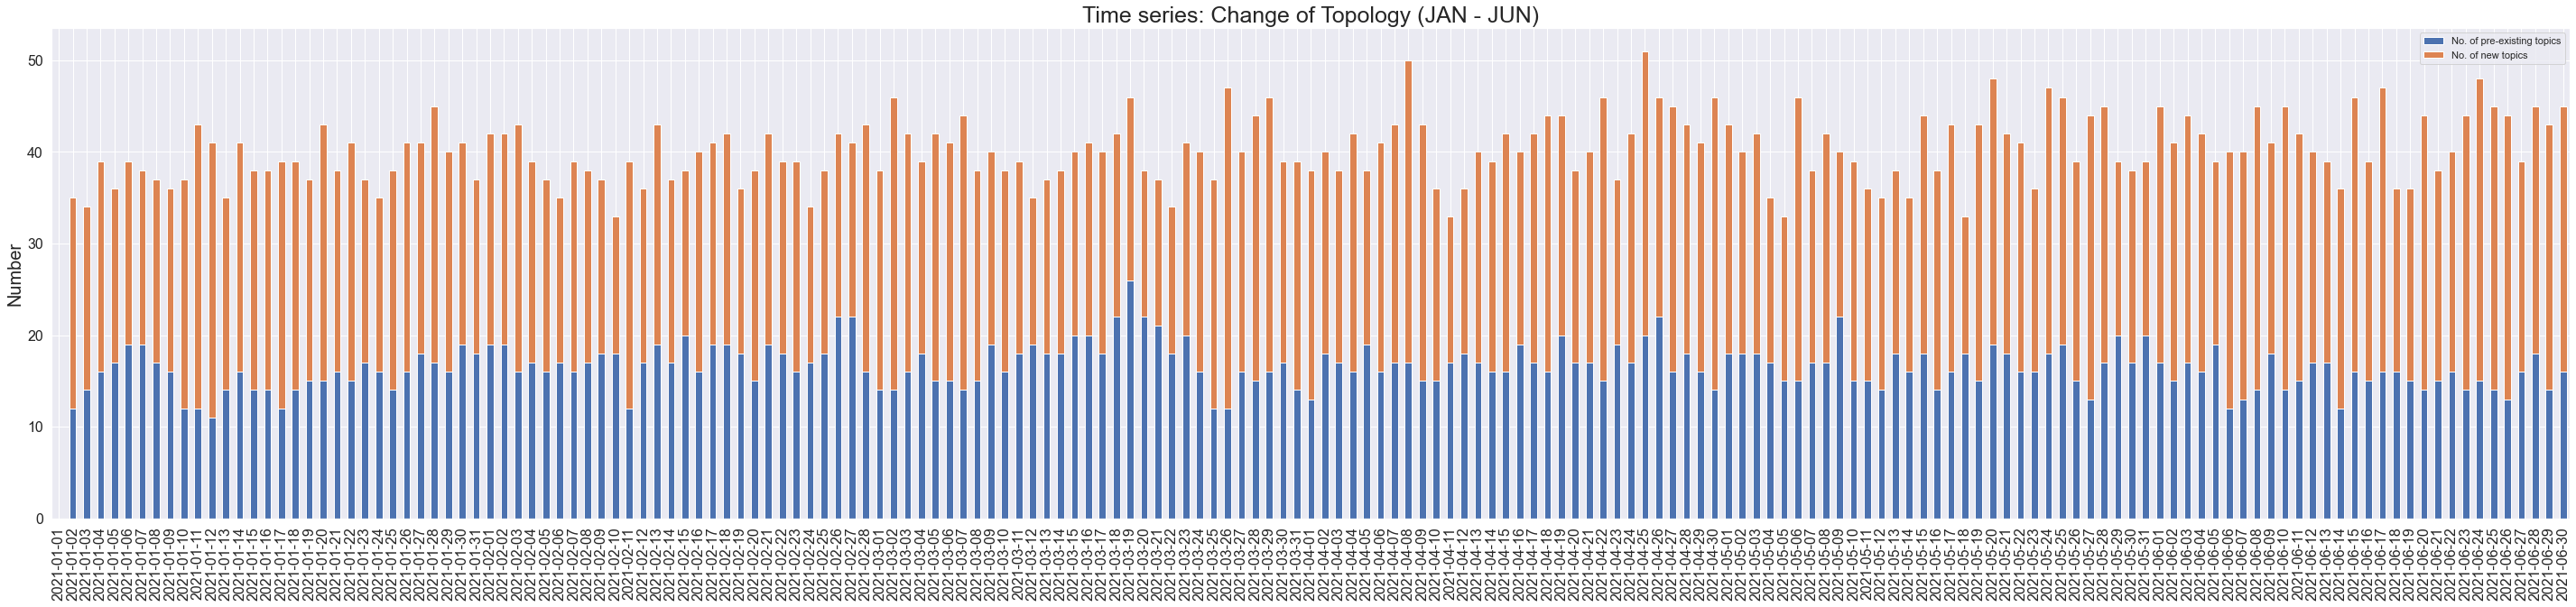

In [796]:
time_interval = df_topology.index.to_series().between('2021-01-01', '2021-06-30')
sns.set(rc={'figure.figsize':(50, 10)})
num_plot = ['No. of pre-existing topics', 'No. of new topics']
ax = df_topology[time_interval][num_plot].plot.bar(stacked = True)
ax.set_title('Time series: Change of Topology (JAN - JUN)', fontsize=25)
ax.set_ylabel('Number', fontsize=20)
x_dates = df_topology[time_interval].index.strftime('%Y-%m-%d')
plt.yticks(fontsize = 16)
ax.set_xticklabels(labels=x_dates, fontsize = 16)
plt.savefig('../image_demo_6_months/Time series barplot 1-2.png', dpi = 500)

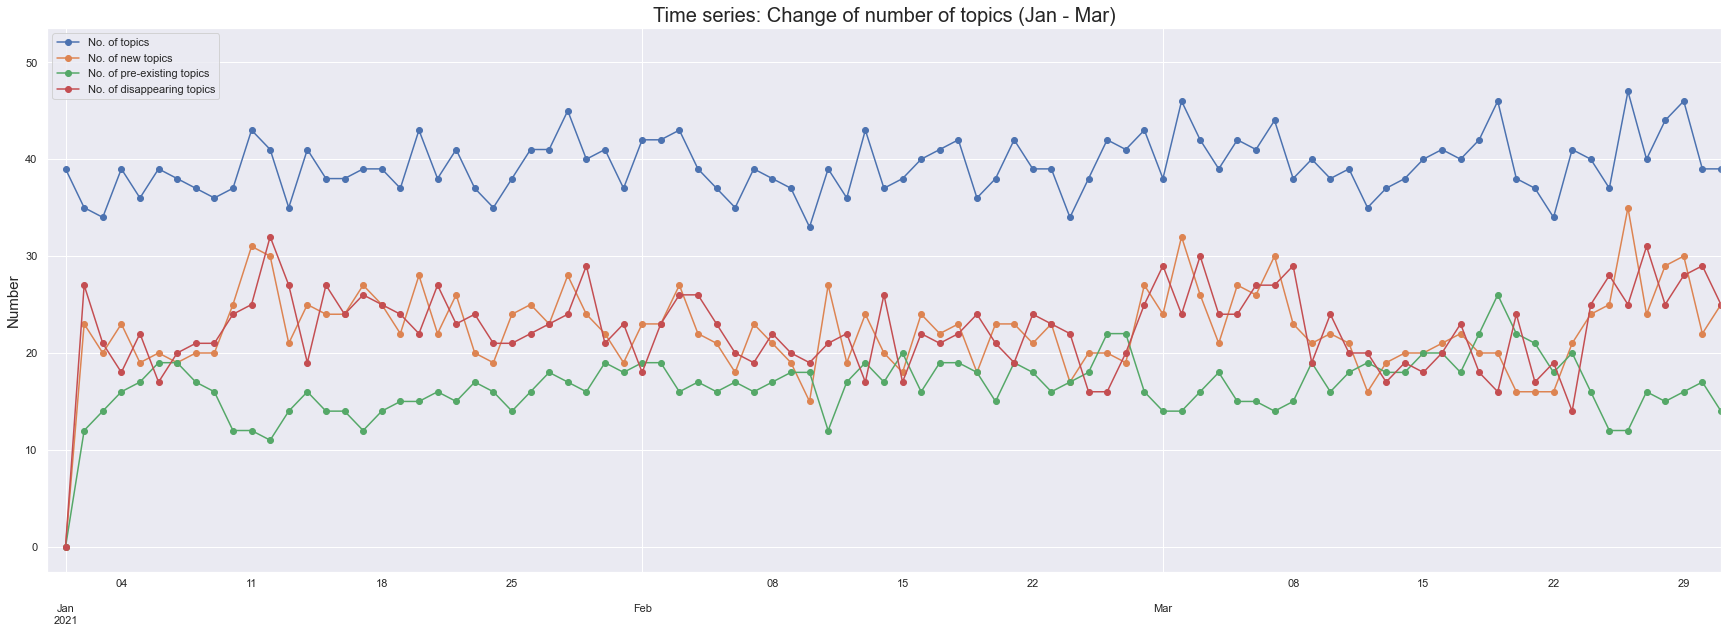

In [105]:
sns.set(rc={'figure.figsize':(30, 10)})
num_plot = ['No. of topics', 'No. of new topics','No. of pre-existing topics', 'No. of disappearing topics']
ax = df_topology[num_plot].plot(marker='o')
ax.set_title('Time series: Change of Topology (Jan - Mar)', fontsize=20)
ax.set_ylabel('Number', fontsize=15)
ax.set_xlim('2020-12-31', '2021-03-31')
plt.savefig('../image_demo_6_months/Time series 1-3.png', dpi = 500)

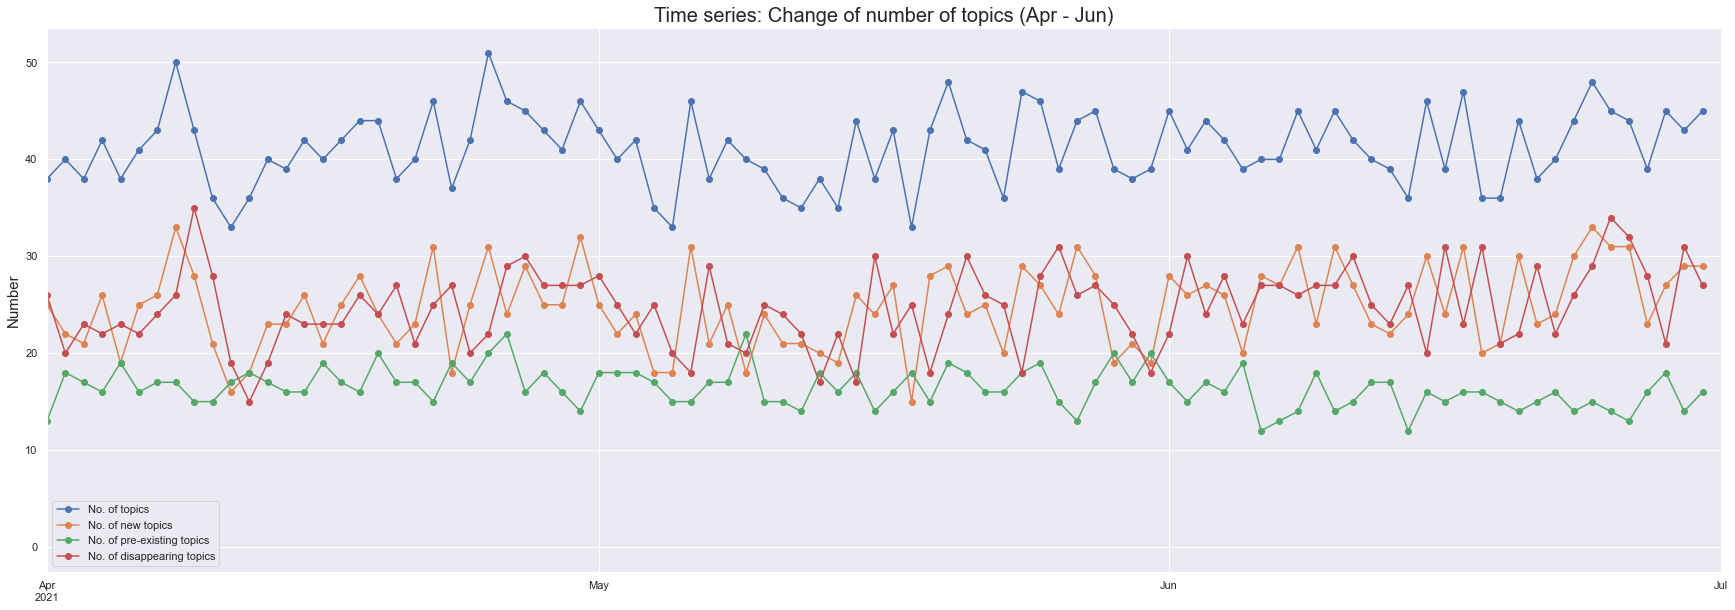

In [106]:
sns.set(rc={'figure.figsize':(30, 10)})
num_plot = ['No. of topics', 'No. of new topics','No. of pre-existing topics', 'No. of disappearing topics']
ax = df_topology[num_plot].plot(marker='o')
ax.set_title('Time series: Change of Topology (Apr - Jun)', fontsize=20)
ax.set_ylabel('Number', fontsize=15)
ax.set_xlim('2021-04-01', '2021-07-01')
plt.savefig('../image_demo_6_months/Time series 4-6.png', dpi = 500)

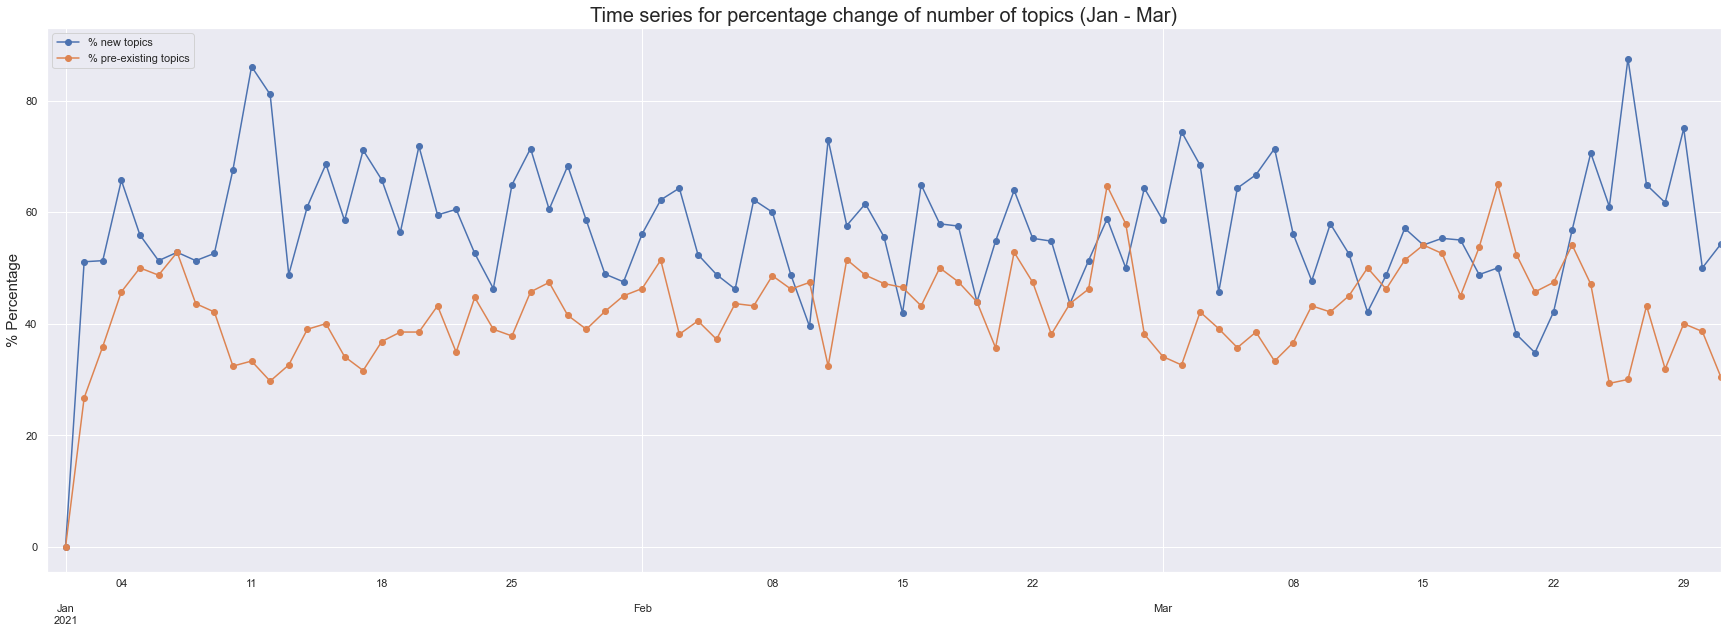

In [107]:
sns.set(rc={'figure.figsize':(30, 10)})
perc_plot = ['% new topics', '% pre-existing topics']
ax = df_topology[perc_plot].plot(marker='o')
ax.set_title('Time series for percentage Change of Topology (Jan - Mar)', fontsize=20)
ax.set_ylabel('% Percentage', fontsize=15)
ax.set_xlim('2020-12-31', '2021-03-31')
plt.savefig('../image_demo_6_months/Time series % 1-3.png', dpi = 500)

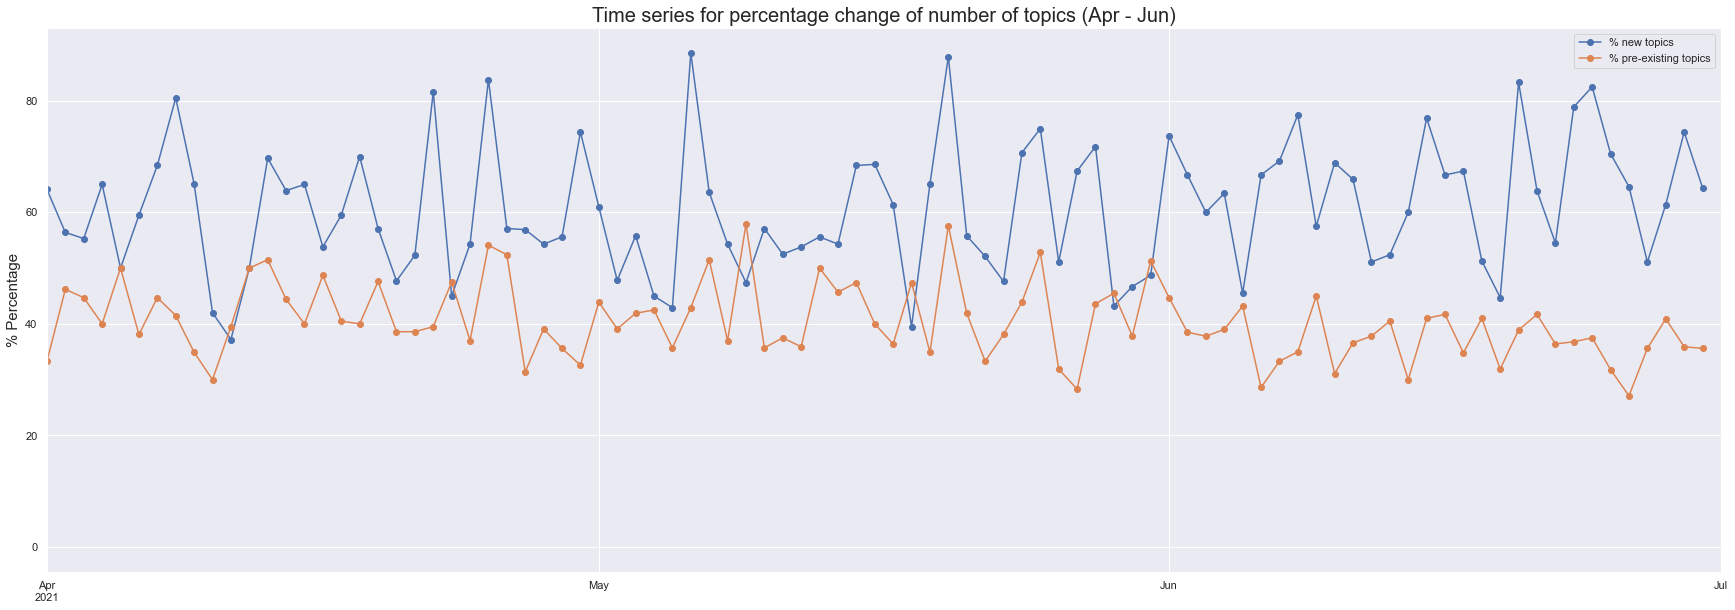

In [108]:
sns.set(rc={'figure.figsize':(30, 10)})
perc_plot = ['% new topics', '% pre-existing topics']
ax = df_topology[perc_plot].plot(marker='o')
ax.set_title('Time series for percentage Change of Topology (Apr - Jun)', fontsize=20)
ax.set_ylabel('% Percentage', fontsize=15)
ax.set_xlim('2021-04-01', '2021-07-01')
plt.savefig('../image_demo_6_months/Time series % 3-6.png', dpi = 500)